

<img src = https://wallpapercave.com/wp/wp7104495.jpg >


# IPL Data Analysis (2008 - 2022)

The ***`Indian Premier League (IPL)`***, one of the most celebrated sports league across the globe. It is a professional cricket league held annually with city based franchise teams. It brings with itself great thrill and entertainment featuring world class players from all over the globe. The teams are owned by different celebrities, businessmen, and investors, and they bid for players in an auction before the start of the tournament. It is not just a regular cricket match where the teams are contesting to win the game but a plethora of entertainment, emotions, people's love for the game and a great experience for the fans who watch their favorite players belonging to different countries coming together or against it each other in the league.

However, as much as the ***`IPL`*** is a great source of entertainment, it also has significant impact in India's economy as it is administered by ***`Board of Control for Cricket in India (BCCI)`***. It generates lots of revenue through various channels like through broadcasting rights, sponsorships, and merchandise sales which in turn creates jobs and boosts overall economy.

With the IPL season going on, I found it relevant to try my hands on analyzing IPL data which I got from https://www.kaggle.com/  . Here is the link to the dataset that I have used: https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv . 

The dataset has two files, one which contains the match data and the other has the ball by ball data of all the matches. The match dataset has details like the venue, dates, winner, best player and the teams contesting. The ball by ball dataset as understood by the names has the details like the run scored, extra run scored, wicket taken for every ball of each match. The idea is to merge the datasets into one with all the required details for making an analysis for each season of ***`IPL`***. Further, to execute all of this I will be using all the knowledge that I have gained from the Data Analysis tutorial by **`Akash N S`** on https://jovian.com/ platform. 

Here's, the link for the course by **`Akash N S`**: [Data Analysis with Python: Zero to Pandas]https://jovian.com/outlink?url=zerotopandas.com

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Downloading the dataset from https://www.kaggle.com/

The dataset used by me: https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imteyajali
Your Kaggle Key: ········


100%|██████████| 1.58M/1.58M [00:00<00:00, 37.2MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './ipl-2008-to-2021-all-match-dataset'

In [5]:
import os
os.listdir(data_dir)

['IPL_Ball_by_Ball_2008_2022.csv', 'IPL_Matches_2008_2022.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "ipl-data-analysis-2008-to-2022"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "skimteyajali1998/ipl-data-analysis-2008-to-2022" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/skimteyajali1998/ipl-data-analysis-2008-to-2022


'https://jovian.com/skimteyajali1998/ipl-data-analysis-2008-to-2022'

## Data Preparation and Cleaning

Loading the datasets into a data frame and going through the type of values that are stored. Checking if there are any null values and finding a measure to work with the null values. Merging the two datasets into one with all the required information to begin with the analysis.



In [10]:
import pandas as pd
import numpy as np

Loading the datasets into a data frame using pandas

In [11]:
match_df=pd.read_csv(data_dir + '/IPL_Matches_2008_2022.csv')

***`Match Dataset`***

In [12]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


`Some basic information about Match Dataset`

In [13]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

From the information above we can see that the data frame has 950 rows and 20 columns (each holding values of different data type) and we can also see that few columns also have null values from the non-null count displayed above.

The columns `City`, `SuperOver`,`Winning Team`, `Margin`, `method` and `Player_of_match` have null values.

Let us check the number of null vales for all the columns.

In [14]:
null_values_count=match_df.isnull().sum()

In [15]:
null_values_count

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

As we can see `City` has 51 null values, `SuperOver` has 4 null values, `WinningTeam` has 4 null values, `Margin` has 18 null values, `Player_of_match` has 4 null values and `method` with the most null value of 931.

Let us check the null values of each of the column and determine if it can filled with some relevant value or we have to drop the column.

Checking the null values of `City`

In [16]:
match_df[match_df.City.isna()==True]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,1237181,NaN,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,NaN,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
137,1237177,NaN,2020-11-05,2020/21,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,NaN,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...",CB Gaffaney,Nitin Menon
138,1216495,NaN,2020-11-03,2020/21,56,Mumbai Indians,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,NaN,S Nadeem,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",C Shamshuddin,RK Illingworth
140,1216530,NaN,2020-11-01,2020/21,54,Kolkata Knight Riders,Rajasthan Royals,Dubai International Cricket Stadium,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,60.0,NaN,PJ Cummins,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'SP ...","['RV Uthappa', 'BA Stokes', 'SPD Smith', 'SV S...",Nitin Menon,PR Reiffel
142,1216535,NaN,2020-10-31,2020/21,51,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,9.0,NaN,Ishan Kishan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['Ishan Kishan', 'Q de Kock', 'SA Yadav', 'SS ...",YC Barde,PR Reiffel
143,1216502,NaN,2020-10-31,2020/21,52,Royal Challengers Bangalore,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,5.0,NaN,Sandeep Sharma,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",KN Ananthapadmanabhan,K Srinivasan
145,1216536,NaN,2020-10-29,2020/21,49,Kolkata Knight Riders,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,NaN,RD Gaikwad,"['Shubman Gill', 'N Rana', 'SP Narine', 'RK Si...","['SR Watson', 'RD Gaikwad', 'AT Rayudu', 'MS D...",C Shamshuddin,RK Illingworth
147,1216524,NaN,2020-10-27,2020/21,47,Sunrisers Hyderabad,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Sunrisers Hyderabad,Runs,88.0,NaN,WP Saha,"['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...","['AM Rahane', 'S Dhawan', 'MP Stoinis', 'SO He...",AK Chaudhary,Nitin Menon
148,1216520,NaN,2020-10-26,2020/21,46,Kolkata Knight Riders,Kings XI Punjab,Sharjah Cricket Stadium,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,8.0,NaN,CH Gayle,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'KD ...","['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N P...",KN Ananthapadmanabhan,RK Illingworth
150,1216544,NaN,2020-10-25,2020/21,44,Royal Challengers Bangalore,Chennai Super Kings,Dubai International Cricket Stadium,Royal Challengers Bangalore,bat,N,Chennai Super Kings,Wickets,8.0,NaN,RD Gaikwad,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RD Gaikwad', 'F du Plessis', 'AT Rayudu', 'M...",C Shamshuddin,RK Illingworth


As we can see that the null values of the city does not have the city name in which the match was held and dropping these rows with null values of city will lead to deleting the entire row and the details of all those matches. As a result, it will give an incorrect analysis.

However, since we have the venue of all the matches we can use the venue to search for the city to which it belongs and fill the null values of the city column.

Let us see the null values in the city column belong to which venue or venues.

In [17]:
match_df[match_df.City.isna()==True].Venue.unique()

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium'],
      dtype=object)

The null value of the city belong to venue `'Dubai International Cricket Stadium'` and `'Sharjah Cricket Stadium'`

We can look up for the city to which the venues belong and fill the null values of the `City` column.

Filling the null values of the `City` column.

In [18]:
match_df.loc[(match_df['Venue']=='Dubai International Cricket Stadium'),['City']]='Dubai'
match_df.loc[(match_df['Venue']=='Sharjah Cricket Stadium'),['City']]='Sharjah'

Checking the null values (if any) after filling the values.

In [19]:
match_df.City.isnull().sum()

0

The count of null values in `City` column is now `Zero`.

In [20]:
match_df[match_df.City.isna()==True]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2


Hence, the `City` column does not have any null values now.

Checking the null values of `SuperOver` column.

In [21]:
match_df[match_df.SuperOver.isna()==True]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


As we can see that the 4 null values of `SuperOver`column also have null values for the columns like `WinningTeam`, `Player_of_Match`. So, looking into the null values of `WinningTeam` and `Player_of_Match` first would help us to better determine what must be the reason for the null values and how it can be tackled.

As we know every match will have an outcome i.e. win or lose. Null values of `WinningTeam` could specify that may be those matches were not held or were interrupted. To know about the specific reason we need to dig deeper and search for the match details on the Internet for the matches that does not have any result and decide weather to drop the values or keep it.

Since the number of null values for `WinningTeam` is less i.e. 4, so looking up for the details for these 4 matches wont be a big task. Also, the `WonBy` column of these null values displays `'NoResults'` which suggests that these matches were possibly not held. 

With the help of the match number from the `MatchNumber` column and the season to which these matches belong we can look up in the official website of IPL https://www.iplt20.com/ and get an affirmation on the matches being canceled or interrupted.

After some research on the matches with `WinningTeam` having null values it is found that all these matches were called off due to heavy downpour. The corresponding `Player_of_match` column values of these `WinningTeam` having null values will also have no outcomes as the matches were called off.

Below are the links to the highlights of the matches.

`Royal Challengers Bangalore vs Rajasthan Royals`, 2019, Match 49: https://www.iplt20.com/video/183991/m49-rcb-vs-rr-match-highlights

`Royal Challengers Bangalore vs Delhi Daredevils`, 2015, Match 55: https://www.iplt20.com/video/13719/m55-rcb-vs-dd-match-highlights

`Royal Challengers Bangalore vs	Rajasthan Royals`, 2015, Match 29: https://www.iplt20.com/video/15683/m29-rcb-vs-rr-match-highlights

`Delhi Daredevils vs	Pune Warriors`, 2011, Match 68: https://www.espncricinfo.com/series/indian-premier-league-2011-466304/delhi-daredevils-vs-pune-warriors-68th-match-501265/live-cricket-score

Filling the null values of `SuperOver`, `WinningTeam` and `Player_of_Match`

In [22]:
match_df.SuperOver.fillna('NoResults', inplace=True)
match_df.WinningTeam.fillna('NoResults', inplace=True)
match_df.Player_of_Match.fillna('NoResults', inplace=True)

The null values here are being filled instead of deleting the records because though the matches were called of, there were some runs scored or wickets taken and other statistics, which is taken into account and it gets added to the players career stats.

Checking the null values (if any) after filling the values.

In [23]:
match_df.SuperOver.isnull().sum()

0

In [24]:
match_df.WinningTeam.isnull().sum()

0

In [25]:
match_df.Player_of_Match.isnull().sum()

0

Now, there are `no null values` in `SuperOver`, `WinningTeam` and `Player_of_Match` columns.

Checking the null values of `Margin` column

In [26]:
match_df[match_df.Margin.isna()==True]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
114,1254077,Chennai,2021-04-25,2021,20,Delhi Capitals,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk, Chennai",Delhi Capitals,bat,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SPD Smith'...","['DA Warner', 'JM Bairstow', 'KS Williamson', ...",CB Gaffaney,KN Ananthapadmanabhan
158,1216512,Abu Dhabi,2020-10-18,2020/21,35,Kolkata Knight Riders,Sunrisers Hyderabad,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,Y,Kolkata Knight Riders,SuperOver,NaN,NaN,LH Ferguson,"['Shubman Gill', 'RA Tripathi', 'N Rana', 'AD ...","['JM Bairstow', 'KS Williamson', 'PK Garg', 'D...",PG Pathak,S Ravi
159,1216517,Dubai,2020-10-18,2020/21,36,Mumbai Indians,Kings XI Punjab,Dubai International Cricket Stadium,Mumbai Indians,bat,Y,Kings XI Punjab,SuperOver,NaN,NaN,KL Rahul,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['KL Rahul', 'MA Agarwal', 'CH Gayle', 'N Poor...",Nitin Menon,PR Reiffel
184,1216547,Dubai,2020-09-28,2020/21,10,Royal Challengers Bangalore,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,Y,Royal Challengers Bangalore,SuperOver,NaN,NaN,AB de Villiers,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",Nitin Menon,PR Reiffel
192,1216493,Dubai,2020-09-20,2020/21,2,Delhi Capitals,Kings XI Punjab,Dubai International Cricket Stadium,Kings XI Punjab,field,Y,Delhi Capitals,SuperOver,NaN,NaN,MP Stoinis,"['PP Shaw', 'S Dhawan', 'SO Hetmyer', 'SS Iyer...","['KL Rahul', 'MA Agarwal', 'KK Nair', 'N Poora...",AK Chaudhary,Nitin Menon
203,1178426,Mumbai,2019-05-02,2019,51,Mumbai Indians,Sunrisers Hyderabad,Wankhede Stadium,Mumbai Indians,bat,Y,Mumbai Indians,SuperOver,NaN,NaN,JJ Bumrah,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'E Lewi...","['WP Saha', 'MJ Guptill', 'MK Pandey', 'KS Wil...",CK Nandan,S Ravi
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NoResults,NoResults,NoResults,NaN,NaN,NoResults,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
244,1175365,Delhi,2019-03-30,2019,10,Kolkata Knight Riders,Delhi Capitals,Arun Jaitley Stadium,Delhi Capitals,field,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['NS Naik', 'CA Lynn', 'RV Uthappa', 'N Rana',...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",AY Dandekar,Nitin Menon
339,1082625,Rajkot,2017-04-29,2017,35,Gujarat Lions,Mumbai Indians,Saurashtra Cricket Association Stadium,Gujarat Lions,bat,Y,Mumbai Indians,SuperOver,NaN,NaN,KH Pandya,"['Ishan Kishan', 'BB McCullum', 'SK Raina', 'A...","['PA Patel', 'JC Buttler', 'N Rana', 'RG Sharm...",AK Chaudhary,CB Gaffaney
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NoResults,NoResults,NoResults,NaN,NaN,NoResults,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan


The `Margin` column has null values for matches which were won by super over and those which got called off.

Filling the null values of `Margin` column.

In [27]:
match_df.Margin.fillna('NoMargin', inplace=True)

Checking the null values (if any) after filling the values.

In [28]:
match_df.Margin.isnull().sum()

0

No null values is `Margin` column.

Checking the null values of `Method` column

In [29]:
match_df[match_df.method.isna()==True]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


`method` column specifies whether a match result was decided by any system like `DLS method`. The null values here means that those matches did not require any DLS system to decide the result of the match.

Lets see what unique values does the `method` column store.

In [30]:
match_df.method.unique()

array([nan, 'D/L'], dtype=object)

It only has `nan` and `D/L`. So we can fill the `nan` values by `Non D/L` to represent that the matches were won by playing against each other and not by any `DLS system`.

Filling the null values of `method` column.

In [31]:
match_df.method.fillna('Non D/L', inplace=True)

Checking the null values (if any) after filling the values.

In [32]:
match_df.method.isnull().sum()

0

No null values in `method` column after filling.

Let us check the number of null vales for all the columns after all the null values have been filled.

In [33]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               950 non-null    int64 
 1   City             950 non-null    object
 2   Date             950 non-null    object
 3   Season           950 non-null    object
 4   MatchNumber      950 non-null    object
 5   Team1            950 non-null    object
 6   Team2            950 non-null    object
 7   Venue            950 non-null    object
 8   TossWinner       950 non-null    object
 9   TossDecision     950 non-null    object
 10  SuperOver        950 non-null    object
 11  WinningTeam      950 non-null    object
 12  WonBy            950 non-null    object
 13  Margin           950 non-null    object
 14  method           950 non-null    object
 15  Player_of_Match  950 non-null    object
 16  Team1Players     950 non-null    object
 17  Team2Players     950 non-null    ob

In [34]:
match_df.isnull().sum()

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          0
WinningTeam        0
WonBy              0
Margin             0
method             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
dtype: int64

Therefore there are no null values in the dataframe.

In [35]:
match_df.nunique()

ID                 950
City                33
Date               706
Season              15
MatchNumber         80
Team1               18
Team2               18
Venue               49
TossWinner          18
TossDecision         2
SuperOver            3
WinningTeam         19
WonBy                4
Margin              95
method               2
Player_of_Match    263
Team1Players       932
Team2Players       937
Umpire1             58
Umpire2             60
dtype: int64

In [36]:
match_df.sample(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
795,419145,Bangalore,2010-04-08,2009/10,40,Royal Challengers Bangalore,Deccan Chargers,M Chinnaswamy Stadium,Deccan Chargers,field,N,Deccan Chargers,Wickets,7.0,Non D/L,TL Suman,"['MK Pandey', 'JH Kallis', 'R Dravid', 'RV Uth...","['AC Gilchrist', 'MD Mishra', 'TL Suman', 'RG ...",S Asnani,DJ Harper
248,1175361,Kolkata,2019-03-27,2019,6,Kolkata Knight Riders,Kings XI Punjab,Eden Gardens,Kings XI Punjab,field,N,Kolkata Knight Riders,Runs,28.0,Non D/L,AD Russell,"['CA Lynn', 'SP Narine', 'RV Uthappa', 'N Rana...","['KL Rahul', 'CH Gayle', 'MA Agarwal', 'SN Kha...",AK Chaudhary,VA Kulkarni
750,501223,Delhi,2011-04-23,2011,26,Delhi Daredevils,Kings XI Punjab,Feroz Shah Kotla,Kings XI Punjab,field,N,Delhi Daredevils,Runs,29.0,Non D/L,DA Warner,"['DA Warner', 'V Sehwag', 'Y Nagar', 'Y Venugo...","['AC Gilchrist', 'PC Valthaty', 'SE Marsh', 'K...",S Asnani,RE Koertzen
643,548366,Chandigarh,2012-05-13,2012,61,Kings XI Punjab,Deccan Chargers,"Punjab Cricket Association Stadium, Mohali",Deccan Chargers,bat,N,Kings XI Punjab,Wickets,4.0,Non D/L,DJ Hussey,"['N Saini', 'Mandeep Singh', 'SE Marsh', 'Azha...","['S Dhawan', 'PA Patel', 'KC Sangakkara', 'CL ...",HDPK Dharmasena,BNJ Oxenford
907,336026,Bangalore,2008-05-19,2007/08,43,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Delhi Daredevils,field,N,Delhi Daredevils,Wickets,5.0,Non D/L,SP Goswami,"['JH Kallis', 'B Chipli', 'SP Goswami', 'R Dra...","['G Gambhir', 'V Sehwag', 'AB de Villiers', 'T...",SJ Davis,GA Pratapkumar
406,980951,Delhi,2016-04-30,2016,26,Delhi Daredevils,Kolkata Knight Riders,Feroz Shah Kotla,Kolkata Knight Riders,field,N,Delhi Daredevils,Runs,27.0,Non D/L,CR Brathwaite,"['Q de Kock', 'SS Iyer', 'SV Samson', 'KK Nair...","['RV Uthappa', 'G Gambhir', 'PP Chawla', 'YK P...",KN Ananthapadmanabhan,M Erasmus
89,1254102,Dubai,2021-10-01,2021,45,Kolkata Knight Riders,Punjab Kings,Dubai International Cricket Stadium,Punjab Kings,field,N,Punjab Kings,Wickets,5.0,Non D/L,KL Rahul,"['VR Iyer', 'Shubman Gill', 'RA Tripathi', 'N ...","['KL Rahul', 'MA Agarwal', 'N Pooran', 'AK Mar...",KN Ananthapadmanabhan,RK Illingworth
123,1254068,Mumbai,2021-04-18,2021,11,Punjab Kings,Delhi Capitals,"Wankhede Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,6.0,Non D/L,S Dhawan,"['KL Rahul', 'MA Agarwal', 'CH Gayle', 'DJ Hoo...","['PP Shaw', 'S Dhawan', 'SPD Smith', 'RR Pant'...",AK Chaudhary,PR Reiffel
419,980927,Mumbai,2016-04-20,2016,14,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,6.0,Non D/L,RG Sharma,"['RG Sharma', 'PA Patel', 'AT Rayudu', 'JC But...","['V Kohli', 'KL Rahul', 'AB de Villiers', 'SR ...",AK Chaudhary,CK Nandan
164,1216543,Dubai,2020-10-14,2020/21,30,Delhi Capitals,Rajasthan Royals,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,13.0,Non D/L,A Nortje,"['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...","['BA Stokes', 'JC Buttler', 'SPD Smith', 'SV S...",AK Chaudhary,Nitin Menon


The `Season` column represents the year on which the IPL was held but there some values in the column like `2009/10` and `2007/08`. These values needs to be changed to a proper value i.e. a specific year.

As the `Season` column represents the year and that year corresponds to year of the `Date` column. So we can use the year from the values of `Date` to correct the data in `Season` column.

In [37]:
match_df.Date.dtype

dtype('O')

Changing the data type of `Date` column to date time format in pandas.

In [38]:
match_df['Date']=pd.to_datetime(match_df.Date)

In [39]:
match_df.Date.dtype

dtype('<M8[ns]')

Data type of `Date` column changed to date time format of pandas.

Extracting the year from the dates of `Date` column and storing it in `Season` column as it represents the year on which the IPL was held and the year here corresponds to year of the Date column so that we can get the correct values of `Season` column.

In [40]:
match_df['Season']=pd.DatetimeIndex(match_df.Date).year

In [41]:
match_df.Season.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008])

We now have the corrected values of the `Season` column.

In [42]:
match_df.sample(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
197,1181764,Chennai,2019-05-07,2019,Qualifier,Chennai Super Kings,Mumbai Indians,MA Chidambaram Stadium,Chennai Super Kings,bat,N,Mumbai Indians,Wickets,6.0,Non D/L,SA Yadav,"['F du Plessis', 'SR Watson', 'SK Raina', 'M V...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",NJ Llong,Nitin Menon
481,829727,Visakhapatnam,2015-04-16,2015,11,Sunrisers Hyderabad,Rajasthan Royals,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Rajasthan Royals,field,N,Rajasthan Royals,Wickets,6.0,Non D/L,AM Rahane,"['DA Warner', 'S Dhawan', 'KL Rahul', 'NV Ojha...","['AM Rahane', 'SV Samson', 'SPD Smith', 'KK Na...",PG Pathak,S Ravi
785,419155,Chennai,2010-04-15,2010,50,Chennai Super Kings,Delhi Daredevils,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,N,Delhi Daredevils,Wickets,6.0,Non D/L,G Gambhir,"['M Vijay', 'ML Hayden', 'MS Dhoni', 'SK Raina...","['V Sehwag', 'DA Warner', 'TM Dilshan', 'G Gam...",HDPK Dharmasena,SS Hazare
355,1082609,Hyderabad,2017-04-17,2017,19,Sunrisers Hyderabad,Kings XI Punjab,"Rajiv Gandhi International Stadium, Uppal",Kings XI Punjab,field,N,Sunrisers Hyderabad,Runs,5.0,Non D/L,B Kumar,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['HM Amla', 'M Vohra', 'GJ Maxwell', 'EJG Morg...",AY Dandekar,A Deshmukh
327,1082636,Bangalore,2017-05-07,2017,46,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,6.0,Non D/L,SP Narine,"['CH Gayle', 'Mandeep Singh', 'V Kohli', 'AB d...","['CA Lynn', 'SP Narine', 'C de Grandhomme', 'G...",AY Dandekar,C Shamshuddin
515,734003,Ranchi,2014-05-13,2014,37,Chennai Super Kings,Rajasthan Royals,JSCA International Stadium Complex,Rajasthan Royals,bat,N,Chennai Super Kings,Wickets,5.0,Non D/L,RA Jadeja,"['DR Smith', 'BB McCullum', 'SK Raina', 'F du ...","['Ankit Sharma', 'SR Watson', 'AM Rahane', 'KK...",BNJ Oxenford,C Shamshuddin
411,980943,Hyderabad,2016-04-26,2016,22,Sunrisers Hyderabad,Rising Pune Supergiants,"Rajiv Gandhi International Stadium, Uppal",Rising Pune Supergiants,field,N,Rising Pune Supergiants,Runs,34.0,D/L,AB Dinda,"['DA Warner', 'S Dhawan', 'AP Tare', 'EJG Morg...","['AM Rahane', 'F du Plessis', 'SPD Smith', 'MS...",AY Dandekar,CK Nandan
782,419158,Kolkata,2010-04-17,2010,53,Kolkata Knight Riders,Rajasthan Royals,Eden Gardens,Rajasthan Royals,bat,N,Kolkata Knight Riders,Wickets,8.0,Non D/L,JD Unadkat,"['SC Ganguly', 'BB McCullum', 'CH Gayle', 'CA ...","['SR Watson', 'NV Ojha', 'YK Pathan', 'AJ Finc...",BG Jerling,RB Tiffin
617,598007,Chandigarh,2013-04-10,2013,11,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,field,N,Chennai Super Kings,Wickets,10.0,Non D/L,MEK Hussey,"['Mandeep Singh', 'AC Gilchrist', 'M Vohra', '...","['M Vijay', 'MEK Hussey', 'SK Raina', 'S Badri...",Aleem Dar,C Shamshuddin
275,1136599,Hyderabad,2018-05-07,2018,39,Sunrisers Hyderabad,Royal Challengers Bangalore,Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,N,Sunrisers Hyderabad,Runs,5.0,Non D/L,KS Williamson,"['AD Hales', 'S Dhawan', 'KS Williamson', 'MK ...","['M Vohra', 'PA Patel', 'V Kohli', 'AB de Vill...",BNJ Oxenford,VK Sharma


There were few teams in IPL from 2008 to 2022 which changed their names overtime but were representing the same franchise. So we will go through the teams in the data frame and check if there are any teams that changed their name but are being considered as a unique entry in the data frame. If so, then we will change those names to the current name that they are having.

In [43]:
#old values
match_df.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

As we can see, we have `'Delhi Capitals'` and `'Delhi Daredevils'`, `'Punjab Kings'` and `'Kings XI Punjab'`, `'Rising Pune Supergiant'` and `'Rising Pune Supergiants'` that changed their names but represent the same franchise.

Changing these team names to the current name that they are having.

In [44]:
match_df.replace(to_replace='Delhi Daredevils', value='Delhi Capitals', inplace=True)
match_df.replace(to_replace='Kings XI Punjab', value='Punjab Kings', inplace=True)
match_df.replace(to_replace='Rising Pune Supergiants', value='Rising Pune Supergiant', inplace=True)

This operation has replaced all instances of the old values in the entire data frame with the new values. As a result, columns such as `Team2` and `WinningTeam` that previously contained the old values have been updated to reflect the new names as well.

In [45]:
#updated values
match_df.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [46]:
#updated values
match_df.Team2.unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Pune Warriors', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

In [47]:
#updated values
match_df.WinningTeam.unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'NoResults',
       'Rising Pune Supergiant', 'Gujarat Lions', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [48]:
match_df.nunique()

ID                 950
City                33
Date               706
Season              15
MatchNumber         80
Team1               15
Team2               15
Venue               49
TossWinner          15
TossDecision         2
SuperOver            3
WinningTeam         16
WonBy                4
Margin              95
method               2
Player_of_Match    263
Team1Players       932
Team2Players       937
Umpire1             58
Umpire2             60
dtype: int64

In [49]:
match_df.isnull().sum()

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          0
WinningTeam        0
WonBy              0
Margin             0
method             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
dtype: int64

No null values in the entire dataframe.

After performing the necessary cleaning, correcting, and updating of values, the `match_df` data frame is now in a state that is suitable for analysis. We will proceed with further stages of the project and make any additional changes to the data frame if required in those stages.

In [50]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,Non D/L,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,Non D/L,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,Non D/L,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Non D/L,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,Non D/L,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,Non D/L,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2008,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Capitals,Wickets,9.0,Non D/L,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2008,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,Non D/L,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


Loading the other dataset.

In [51]:
ball_by_ball_df=pd.read_csv(data_dir + '/IPL_Ball_by_Ball_2008_2022.csv')

***`Ball by Ball Df`***

In [52]:
ball_by_ball_df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


Getting some basic information about `ball_by_ball_df`

In [53]:
ball_by_ball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

As we can see, `ball_by_ball_df` has `225954 rows` and `17 columns`. It also has few columns with null values

Let us check the columns that have null values and the count of null values in them.

In [54]:
ball_by_ball_df.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

The columns `extra_type`, `player_out`, `kind` and `fielders_involved` have null values.

Lets go through each of these columns with null values, to see what data they represent and determine a way to work with these null values.

Examining the `extra_type` column

In [55]:
ball_by_ball_df.extra_type.unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

The `extra_type` column in the data frame represents the type of extra runs (if any) scored in a particular ball during an innings. It is important to note that not every ball in an innings results in an extra run. The null values in the `extra_type` column correspond to cases where no extra run was scored, either because the batsman scored the run or the ball resulted in a dot ball.

Therefore, the null values of the `extra_type` column can be updated to `NoExtra`.

Filling the null values.

In [56]:
ball_by_ball_df.extra_type.fillna('NoExtra', inplace=True)

In [57]:
ball_by_ball_df.extra_type.unique()

array(['NoExtra', 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [58]:
ball_by_ball_df.extra_type.isnull().sum()

0

Null values have been filled and there are no null values in `extra_type` column.

Examining the `player_out` column.

In [59]:
ball_by_ball_df.player_out.unique()

array([nan, 'YBK Jaiswal', 'SV Samson', 'D Padikkal', 'JC Buttler',
       'SO Hetmyer', 'R Ashwin', 'TA Boult', 'OC McCoy', 'R Parag',
       'WP Saha', 'MS Wade', 'HH Pandya', 'V Kohli', 'F du Plessis',
       'GJ Maxwell', 'RM Patidar', 'MK Lomror', 'KD Karthik',
       'PWH de Silva', 'HV Patel', 'Q de Kock', 'M Vohra', 'DJ Hooda',
       'MP Stoinis', 'KL Rahul', 'KH Pandya', 'Shubman Gill', 'PK Garg',
       'RA Tripathi', 'Abhishek Sharma', 'N Pooran', 'AK Markram',
       'Washington Sundar', 'J Suchith', 'B Kumar', 'JM Bairstow',
       'M Shahrukh Khan', 'MA Agarwal', 'S Dhawan', 'JM Sharma',
       'DA Warner', 'MR Marsh', 'PP Shaw', 'SN Khan', 'RR Pant',
       'R Powell', 'SN Thakur', 'RG Sharma', 'Ishan Kishan', 'D Brevis',
       'TH David', 'Tilak Varma', 'RD Gaikwad', 'DP Conway',
       'N Jagadeesan', 'AT Rayudu', 'MS Dhoni', 'MM Ali', 'DA Miller',
       'R Tewatia', 'VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer',
       'SW Billings', 'AD Russell', 'RK Singh', 'UT Yadav

The `player_out` columns has the names of the player who got dismissed in a particular ball. Further, every ball in a match will not lead to a dismissal. So, the null values of `player_out` column are for those balls where there was no dismissal.

Therefore, the null values of `player_out` column can be updated to `NoDismissal`.

Filling the values.

In [60]:
ball_by_ball_df.player_out.fillna('NoDismissal', inplace=True)

In [61]:
ball_by_ball_df.player_out.unique()

array(['NoDismissal', 'YBK Jaiswal', 'SV Samson', 'D Padikkal',
       'JC Buttler', 'SO Hetmyer', 'R Ashwin', 'TA Boult', 'OC McCoy',
       'R Parag', 'WP Saha', 'MS Wade', 'HH Pandya', 'V Kohli',
       'F du Plessis', 'GJ Maxwell', 'RM Patidar', 'MK Lomror',
       'KD Karthik', 'PWH de Silva', 'HV Patel', 'Q de Kock', 'M Vohra',
       'DJ Hooda', 'MP Stoinis', 'KL Rahul', 'KH Pandya', 'Shubman Gill',
       'PK Garg', 'RA Tripathi', 'Abhishek Sharma', 'N Pooran',
       'AK Markram', 'Washington Sundar', 'J Suchith', 'B Kumar',
       'JM Bairstow', 'M Shahrukh Khan', 'MA Agarwal', 'S Dhawan',
       'JM Sharma', 'DA Warner', 'MR Marsh', 'PP Shaw', 'SN Khan',
       'RR Pant', 'R Powell', 'SN Thakur', 'RG Sharma', 'Ishan Kishan',
       'D Brevis', 'TH David', 'Tilak Varma', 'RD Gaikwad', 'DP Conway',
       'N Jagadeesan', 'AT Rayudu', 'MS Dhoni', 'MM Ali', 'DA Miller',
       'R Tewatia', 'VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer',
       'SW Billings', 'AD Russell', 'RK Singh',

In [62]:
ball_by_ball_df.player_out.isnull().sum()

0

Null values have been filled and there are no null values in `player_out` column.

Examining `kind` column.

In [63]:
ball_by_ball_df.kind.unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

The `kind` column represents the type of dismissal. As mentioned above, every ball will not lead to a dismissal and correspondingly the type of dismissal for balls that had no dismissal will be empty.

Therefore, the null values of `kind` column can be updated to `NotDismissed`.

Filling the values.

In [64]:
ball_by_ball_df.kind.fillna('NotDismissed', inplace=True)

In [65]:
ball_by_ball_df.kind.unique()

array(['NotDismissed', 'caught', 'caught and bowled', 'run out', 'bowled',
       'stumped', 'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [66]:
ball_by_ball_df.kind.isnull().sum()

0

Null values have been filled and there are no null values in `kind` column.

Examining the `fielders_involved` column.

In [67]:
ball_by_ball_df.fielders_involved.unique()

array([nan, 'R Sai Kishore', 'Mohammed Shami', 'WP Saha', 'DA Miller',
       'R Tewatia', 'R Parag', 'YBK Jaiswal', 'SV Samson', 'R Ashwin',
       'OC McCoy', 'JC Buttler', 'V Kohli', 'KD Karthik', 'Q de Kock',
       'Mohsin Khan', 'E Lewis', 'KL Rahul', 'F du Plessis',
       'Shahbaz Ahmed', 'RM Patidar', 'AS Joseph', 'D Padikkal',
       'MA Agarwal', 'S Dhawan', 'LS Livingstone', 'JM Sharma',
       'PN Mankad', 'Washington Sundar', 'J Suchith', 'PK Garg',
       'JJ Bumrah', 'RG Sharma', 'Ishan Kishan', 'TH David', 'SN Thakur',
       'DA Warner', 'PP Shaw', 'RR Pant', 'MM Ali', 'M Pathirana',
       'DP Conway', 'GJ Maxwell', 'HH Pandya', 'MS Wade', 'MP Stoinis',
       'DJ Hooda', 'M Markande', 'Tilak Varma', 'KS Williamson',
       'B Kumar', 'T Natarajan', 'RD Chahar', 'PBB Rajapaksa', 'R Dhawan',
       'Harpreet Brar', 'AR Patel', 'A Nortje', 'R Powell', 'KH Pandya',
       'JDS Neesham', 'Rashid Khan', 'Yash Dayal', 'S Dube',
       'Shashank Singh', 'RA Tripathi', 'SW B

Here, just the column values does not give us much info about what the column is trying to represent. So we need to go through the entire dataframe to understand what does the column represent.

In [68]:
ball_by_ball_df.sample(30)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
50181,1178421,1,19,3,SE Rutherford,Navdeep Saini,AR Patel,NoExtra,1,0,1,0,0,NoDismissal,NotDismissed,NaN,Delhi Capitals
179101,501221,2,6,4,MEK Hussey,Harbhajan Singh,S Badrinath,NoExtra,1,0,1,0,0,NoDismissal,NotDismissed,NaN,Chennai Super Kings
129602,729293,1,16,3,F du Plessis,JD Unadkat,MS Dhoni,NoExtra,1,0,1,0,0,NoDismissal,NotDismissed,NaN,Chennai Super Kings
14380,1304061,1,16,3,SN Khan,Avesh Khan,RR Pant,NoExtra,1,0,1,0,0,NoDismissal,NotDismissed,NaN,Delhi Capitals
97082,980955,2,18,6,P Kumar,MM Sharma,JP Faulkner,NoExtra,0,0,0,0,1,P Kumar,caught,KC Cariappa,Gujarat Lions
159960,548337,2,11,3,LRPL Taylor,R Sharma,V Sehwag,NoExtra,0,0,0,0,0,NoDismissal,NotDismissed,NaN,Delhi Daredevils
44139,1216503,2,1,4,KL Rahul,JL Pattinson,MA Agarwal,NoExtra,1,0,1,0,0,NoDismissal,NotDismissed,NaN,Kings XI Punjab
127757,729309,1,19,6,KA Pollard,JD Unadkat,Z Khan,NoExtra,1,0,1,0,0,NoDismissal,NotDismissed,NaN,Mumbai Indians
214569,336032,2,7,5,S Dhawan,DS Kulkarni,MK Tiwary,NoExtra,0,0,0,0,0,NoDismissal,NotDismissed,NaN,Delhi Daredevils
107387,829789,2,9,5,PA Patel,RA Jadeja,LMP Simmons,NoExtra,0,0,0,0,0,NoDismissal,NotDismissed,NaN,Mumbai Indians


After going through few samples of the dataframe, it is found that the fielders involved is related to a dismissal of player by the involvement of fielder in run out, caught out or stump out.

Below are the parts of dataframe where `fielders_involved` have values where the player has been dismissed by `run out`, `caught` or `stumped`.

In [69]:
ball_by_ball_df[ball_by_ball_df.kind=='run out']

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
117,1312200,1,19,4,R Parag,Mohammed Shami,OC McCoy,NoExtra,1,0,1,0,1,OC McCoy,run out,R Tewatia,Rajasthan Royals
849,1312197,1,19,6,JC Buttler,Yash Dayal,R Parag,noballs,1,1,2,0,1,JC Buttler,run out,WP Saha,Rajasthan Royals
850,1312197,1,19,7,R Ashwin,Yash Dayal,R Parag,wides,0,1,1,0,1,R Parag,run out,WP Saha,Rajasthan Royals
900,1312197,2,7,5,Shubman Gill,R Ashwin,MS Wade,NoExtra,1,0,1,0,1,Shubman Gill,run out,D Padikkal,Gujarat Titans
1100,1304116,1,19,6,R Shepherd,NT Ellis,B Kumar,noballs,0,1,1,0,1,B Kumar,run out,JM Sharma,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224893,335986,1,18,4,RP Singh,M Kartik,PP Ojha,NoExtra,0,0,0,0,1,PP Ojha,run out,Mohammad Hafeez,Deccan Chargers
225051,335985,1,5,4,ST Jayasuriya,Z Khan,RV Uthappa,NoExtra,0,0,0,0,1,ST Jayasuriya,run out,Z Khan,Mumbai Indians
225285,335984,1,3,5,YK Pathan,B Geeves,SR Watson,NoExtra,0,0,0,0,1,YK Pathan,run out,NaN,Rajasthan Royals
225300,335984,1,6,2,SR Watson,R Bhatia,M Kaif,NoExtra,1,0,1,0,1,SR Watson,run out,NaN,Rajasthan Royals


In [70]:
ball_by_ball_df[ball_by_ball_df.kind=='caught']

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
23,1312200,1,3,6,YBK Jaiswal,Yash Dayal,JC Buttler,NoExtra,0,0,0,0,1,YBK Jaiswal,caught,R Sai Kishore,Rajasthan Royals
49,1312200,1,8,2,SV Samson,HH Pandya,JC Buttler,NoExtra,0,0,0,0,1,SV Samson,caught,R Sai Kishore,Rajasthan Royals
70,1312200,1,11,5,D Padikkal,Rashid Khan,JC Buttler,NoExtra,0,0,0,0,1,D Padikkal,caught,Mohammed Shami,Rajasthan Royals
72,1312200,1,12,1,JC Buttler,HH Pandya,SO Hetmyer,NoExtra,0,0,0,0,1,JC Buttler,caught,WP Saha,Rajasthan Royals
94,1312200,1,15,5,R Ashwin,R Sai Kishore,R Parag,NoExtra,0,0,0,0,1,R Ashwin,caught,DA Miller,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225886,335982,2,5,2,W Jaffer,AB Dinda,CL White,NoExtra,0,0,0,0,1,W Jaffer,caught,RT Ponting,Royal Challengers Bangalore
225903,335982,2,7,5,MV Boucher,SC Ganguly,CL White,NoExtra,0,0,0,0,1,MV Boucher,caught,M Kartik,Royal Challengers Bangalore
225906,335982,2,8,2,B Akhil,AB Agarkar,CL White,NoExtra,0,0,0,0,1,B Akhil,caught,RT Ponting,Royal Challengers Bangalore
225912,335982,2,8,8,CL White,AB Agarkar,AA Noffke,NoExtra,0,0,0,0,1,CL White,caught,WP Saha,Royal Challengers Bangalore


In [71]:
ball_by_ball_df[ball_by_ball_df.kind=='stumped']

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
429,1312199,2,11,4,SV Samson,PWH de Silva,JC Buttler,NoExtra,0,0,0,0,1,SV Samson,stumped,KD Karthik,Rajasthan Royals
1066,1304116,1,14,4,AK Markram,Harpreet Brar,Washington Sundar,NoExtra,0,0,0,0,1,AK Markram,stumped,JM Sharma,Sunrisers Hyderabad
1914,1304113,2,16,4,V Kohli,Rashid Khan,GJ Maxwell,NoExtra,0,0,0,0,1,V Kohli,stumped,MS Wade,Royal Challengers Bangalore
2148,1304112,2,15,4,SW Billings,Ravi Bishnoi,AD Russell,NoExtra,0,0,0,0,1,SW Billings,stumped,Q de Kock,Kolkata Knight Riders
2504,1304110,1,11,6,RR Pant,LS Livingstone,MR Marsh,NoExtra,0,0,0,0,1,RR Pant,stumped,JM Sharma,Delhi Capitals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220783,336003,1,11,3,SE Marsh,DJ Hussey,DPMD Jayawardene,NoExtra,0,0,0,0,1,SE Marsh,stumped,WP Saha,Kings XI Punjab
221030,336002,1,11,2,HH Gibbs,A Kumble,AC Gilchrist,NoExtra,0,0,0,0,1,HH Gibbs,stumped,SP Goswami,Deccan Chargers
223840,335990,1,2,2,AC Gilchrist,YK Pathan,VVS Laxman,NoExtra,0,0,0,0,1,AC Gilchrist,stumped,Kamran Akmal,Deccan Chargers
224580,335987,1,7,4,DPMD Jayawardene,D Salunkhe,JR Hopes,NoExtra,0,0,0,0,1,DPMD Jayawardene,stumped,Kamran Akmal,Kings XI Punjab


Therefore, as it is known that every ball in a match will not lead to dismissal and correspondingly for every no dismissal, the `fielders_involved` column will have null value and also for the dismissals where fielder is not involved, the `fielders_involved` column will have null value.

So, the null values of `fielders_involved` can be filled with `'NoFielder'`.

Filling the value.

In [72]:
ball_by_ball_df.fielders_involved.fillna('NoFielder', inplace=True)

In [73]:
ball_by_ball_df.fielders_involved.unique()

array(['NoFielder', 'R Sai Kishore', 'Mohammed Shami', 'WP Saha',
       'DA Miller', 'R Tewatia', 'R Parag', 'YBK Jaiswal', 'SV Samson',
       'R Ashwin', 'OC McCoy', 'JC Buttler', 'V Kohli', 'KD Karthik',
       'Q de Kock', 'Mohsin Khan', 'E Lewis', 'KL Rahul', 'F du Plessis',
       'Shahbaz Ahmed', 'RM Patidar', 'AS Joseph', 'D Padikkal',
       'MA Agarwal', 'S Dhawan', 'LS Livingstone', 'JM Sharma',
       'PN Mankad', 'Washington Sundar', 'J Suchith', 'PK Garg',
       'JJ Bumrah', 'RG Sharma', 'Ishan Kishan', 'TH David', 'SN Thakur',
       'DA Warner', 'PP Shaw', 'RR Pant', 'MM Ali', 'M Pathirana',
       'DP Conway', 'GJ Maxwell', 'HH Pandya', 'MS Wade', 'MP Stoinis',
       'DJ Hooda', 'M Markande', 'Tilak Varma', 'KS Williamson',
       'B Kumar', 'T Natarajan', 'RD Chahar', 'PBB Rajapaksa', 'R Dhawan',
       'Harpreet Brar', 'AR Patel', 'A Nortje', 'R Powell', 'KH Pandya',
       'JDS Neesham', 'Rashid Khan', 'Yash Dayal', 'S Dube',
       'Shashank Singh', 'RA Tripathi

In [74]:
ball_by_ball_df.fielders_involved.isnull().sum()

0

Null values have been filled and there are no null values in kind column.

Checking the dataframe for any null values.

In [75]:
ball_by_ball_df.isnull().sum()

ID                   0
innings              0
overs                0
ballnumber           0
batter               0
bowler               0
non-striker          0
extra_type           0
batsman_run          0
extras_run           0
total_run            0
non_boundary         0
isWicketDelivery     0
player_out           0
kind                 0
fielders_involved    0
BattingTeam          0
dtype: int64

No null values in the entire dataframe.

Changing the names of teams to the current name that they are having. Same as we did in `match_df` data frame.

In [76]:
ball_by_ball_df.replace(to_replace='Delhi Daredevils', value='Delhi Capitals', inplace=True)
ball_by_ball_df.replace(to_replace='Kings XI Punjab', value='Punjab Kings', inplace=True)
ball_by_ball_df.replace(to_replace='Rising Pune Supergiants', value='Rising Pune Supergiant', inplace=True)

The `match_df` data frame has two columns `Team1Players` and `Team2Players` that contain the list of players in each team. These two column are not necessary for the analysis so we can drop these columns.

In [77]:
match_df.Team1Players

0      ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...
1      ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...
2      ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...
3      ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...
4      ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...
                             ...                        
945    ['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...
946    ['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...
947    ['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...
948    ['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...
949    ['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...
Name: Team1Players, Length: 950, dtype: object

In [78]:
match_df.Team2Players

0      ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...
1      ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...
2      ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...
3      ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...
4      ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...
                             ...                        
945    ['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...
946    ['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...
947    ['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...
948    ['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...
949    ['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...
Name: Team2Players, Length: 950, dtype: object

Dropping the columns.

In [79]:
match_df.drop(['Team1Players','Team2Players'], axis=1, inplace=True)

`match_df` data frame  after dropping the columns.

In [80]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,Non D/L,JC Buttler,CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,Non D/L,RM Patidar,J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,Non D/L,DA Miller,BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Non D/L,Harpreet Brar,AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,Non D/L,DJ Hussey,BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,Non D/L,MV Boucher,SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2008,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Capitals,Wickets,9.0,Non D/L,MF Maharoof,Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2008,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,Non D/L,MEK Hussey,MR Benson,SL Shastri


Since the `match_df` data frame only contains the information like date, venue, season, teams playing, winner etc. and it does not have any match statistics like scores, fall of wickets and so on. Therefore, it has to be merged to the `ball_by_ball_df` that has all the stats of each match so that we can have both data at same place and use it as and when required.

Merging the datasets.

Both datasets have a common column named `ID` and in order to merge to datasets we must have a column that is common in both datasets. So, the `ball_by_ball_df` dataset will be merged with `match_df` on the common column `ID`.

In [81]:
IPL_df=ball_by_ball_df.merge(match_df, on='ID')

In [82]:
IPL_df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NoExtra,0,0,...,Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NoExtra,1,0,...,Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NoExtra,0,0,...,Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NoExtra,0,0,...,Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,...,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,Non D/L,BB McCullum,Asad Rauf,RE Koertzen
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NoExtra,1,0,...,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,Non D/L,BB McCullum,Asad Rauf,RE Koertzen
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NoExtra,0,0,...,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,Non D/L,BB McCullum,Asad Rauf,RE Koertzen
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,...,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,Non D/L,BB McCullum,Asad Rauf,RE Koertzen


Since the merged dataframe now has 225954 rows and 34 columns, the default view of the notebook is unable to display all the columns. In order to view all the columns we can change some display options to view all the columns.

Displaying all the columns.

In [83]:
from IPython.display import display
pd.options.display.max_columns = None
display(IPL_df)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NoExtra,0,0,0,0,0,NoDismissal,NotDismissed,NoFielder,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NoDismissal,NotDismissed,NoFielder,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NoExtra,1,0,1,0,0,NoDismissal,NotDismissed,NoFielder,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NoExtra,0,0,0,0,0,NoDismissal,NotDismissed,NoFielder,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NoExtra,0,0,0,0,0,NoDismissal,NotDismissed,NoFielder,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NoDismissal,NotDismissed,NoFielder,Royal Challengers Bangalore,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,Non D/L,BB McCullum,Asad Rauf,RE Koertzen
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NoExtra,1,0,1,0,0,NoDismissal,NotDismissed,NoFielder,Royal Challengers Bangalore,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,Non D/L,BB McCullum,Asad Rauf,RE Koertzen
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NoExtra,0,0,0,0,0,NoDismissal,NotDismissed,NoFielder,Royal Challengers Bangalore,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,Non D/L,BB McCullum,Asad Rauf,RE Koertzen
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NoDismissal,NotDismissed,NoFielder,Royal Challengers Bangalore,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,Non D/L,BB McCullum,Asad Rauf,RE Koertzen


Now all the columns are visible in the above data frame and we can see all the merged columns in the new data frame.

So, along with the `match_df` data frame, the `IPL_df` data frame will also be used further for the analysis and visualization.

We will be using the `IPL_df`mostly when we need to work with statistical data.

Writing the `IPL_df` data frame to a file for reference. You can access the `IPL_df` from the `File` section of the notebook.

In [84]:
IPL_df.to_csv('IPL_data_2008_to_2022.csv', index=None)

In [85]:
#import jovian

In [86]:
#jovian.commit()

## Exploratory Analysis and Visualization

Now that we have our final data frame ready to be worked upon for some analysis and visualization, lets head towards the exciting part of the project. 

We will now be analyzing the data and draw some insights from the IPL data that we have.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [87]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### ***`Analysis of team performance`***

The analysis of team performance includes an evaluation of various metrics such as the number of wins, losses, as well as win and loss percentages. Additionally, we will investigate other factors such as the highest runs scored in each season, the performance of teams in each season based on the number of wins, the performance of teams in different venues, and the total number of playoff and final matches played by each team, along with the number of wins.

To analyze the performance of different teams in terms of wins, losses and win and loss percentage, we need to calculate the following metrics for each team:

    Total Matches Played: The total number of matches played by each team in a given period.

    Total Wins: The total number of matches won by each team in a given period.

    Total Losses: The total number of matches lost by each team in a given period.

    Win Percentage: The percentage of matches won by each team in a given period, calculated as (Total Wins / Total Matches Played) * 100.

    Loss Percentage: The percentage of matches lost by each team in a given period, calculated as (Total Losses / Total Matches Played) * 100.

In [88]:
match_df.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

`Finding the total matches played by each team considering all the seasons(2008 to 2022)`

The function calculates the total number of matches played by a given team by counting the number of occurrences of the team name in both the `Team1` and `Team2` columns of the `match_df` dataframe.

In [89]:
#function to calculate the total matches played by each team
def total_matches_played(team_name):
    df1=match_df.Team1==team_name
    df2=match_df.Team2==team_name
    total=df1.sum() + df2.sum()
    return total

In [90]:
#printing the total matches played by all teams
for team in match_df.Team1.unique():
    print("Total matches played by {}".format(team),"is:", total_matches_played(team))

Total matches played by Rajasthan Royals is: 192
Total matches played by Royal Challengers Bangalore is: 226
Total matches played by Sunrisers Hyderabad is: 152
Total matches played by Delhi Capitals is: 224
Total matches played by Chennai Super Kings is: 208
Total matches played by Gujarat Titans is: 16
Total matches played by Lucknow Super Giants is: 15
Total matches played by Kolkata Knight Riders is: 223
Total matches played by Punjab Kings is: 218
Total matches played by Mumbai Indians is: 231
Total matches played by Rising Pune Supergiant is: 30
Total matches played by Gujarat Lions is: 30
Total matches played by Pune Warriors is: 46
Total matches played by Deccan Chargers is: 75
Total matches played by Kochi Tuskers Kerala is: 14


Representing the total matches played by all teams throughout the IPL season `(2008-2022)` in a data frame.

Looping through each unique team name present in the `Team1` column using the `unique()` function of Pandas. For each team name, the `total_matches_played` function is called, passing the team name as an argument to calculate the total number of matches played by that team. The result of the function call is then assigned as a value to the corresponding team name key in the `total_matches_dict`.

Finally, the dictionary `total_matches_dict` is used to create a new Pandas DataFrame named `total_matches_df` using the `pd.DataFrame.from_dict()` method. The orientation of the DataFrame is set to `'index'` so that the team names become the row indices of the DataFrame, and the column name is set to `'Total_Matches_Played'`.

In [91]:
total_matches_dict={}
for t in match_df.Team1.unique():
    total_matches_dict[t]=total_matches_played(t)

total_matches_df=pd.DataFrame.from_dict(total_matches_dict, orient='index', columns=['Total_Matches_Played'])
total_matches_df

,Total_Matches_Played
Rajasthan Royals,192
Royal Challengers Bangalore,226
Sunrisers Hyderabad,152
Delhi Capitals,224
Chennai Super Kings,208
Gujarat Titans,16
Lucknow Super Giants,15
Kolkata Knight Riders,223
Punjab Kings,218
Mumbai Indians,231


In [92]:
index=total_matches_df.index

In [93]:
tot_matches=total_matches_df.Total_Matches_Played

***`Plotting the total matches played by all team starting from IPL 2008 season to 2022 season.`***

Creating a bar plot using Seaborn that displays the total number of matches played by each team in the `total_matches_df` dataframe with data labels added to the bars. The x-tick labels are rotated for better readability, and the plot is given a title and y-axis label.

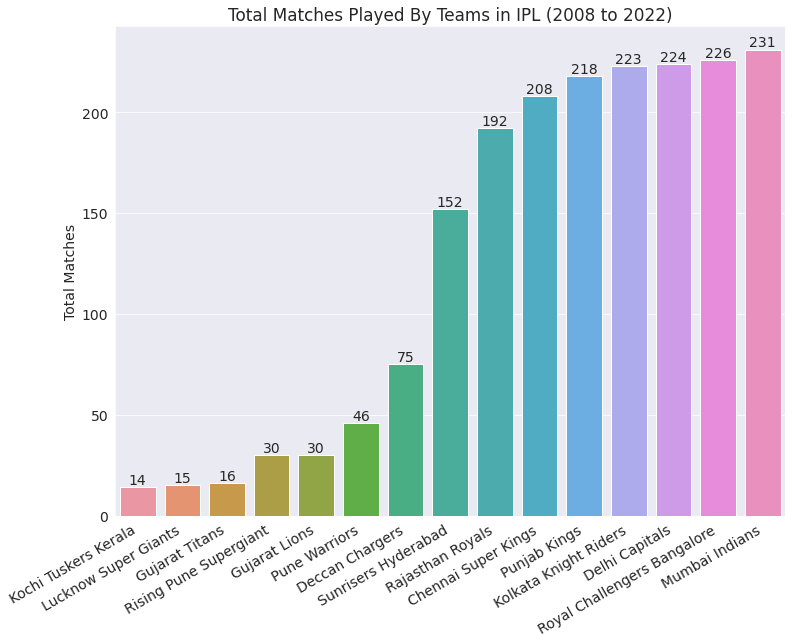

In [94]:
plt.figure(figsize=(12,9))
ax=plt.subplot()

g=sns.barplot(x=total_matches_df.index, y=total_matches_df.Total_Matches_Played, 
              order=total_matches_df.sort_values('Total_Matches_Played').index)
for i in g.containers:
    g.bar_label(i)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Total Matches')
plt.title('Total Matches Played By Teams in IPL (2008 to 2022)')
plt.show();

***`Conclusion`***

The data above shows the total number of matches played by each team in the Indian Premier League (IPL) as of 2022. Based on the data, we can conclude:

1. Mumbai Indians have played the most number of matches, with a total of 231 games.
2. Kochi Tuskers Kerala has played the least number of matches, with a total of only 14 games.
3. The teams with the highest number of matches played after Mumbai Indians are Royal Challengers Bangalore (226) and Delhi Capitals (224).
4. Gujarat Titans and Lucknow Super Giants have played the fewest matches, with only 16 and 15 games respectively.

`Finding total wins by all teams throughout the IPL season (2008 - 2022)`

The function `total_win` calculates the total number of matches won by a given team by counting the number of occurrences of the team name in the `WinningTeam` column of the `match_df` dataframe.

In [95]:
#function to find the total wins of a team
def total_win(team_name):
    win_bool_df=match_df.WinningTeam==team_name
    win_tot=win_bool_df.sum()
    return win_tot

In [96]:
#printing the total wins of all the teams
for team in match_df.Team1.unique():
    print("The total wins by {}".format(team),"is:", total_win(team))

The total wins by Rajasthan Royals is: 96
The total wins by Royal Challengers Bangalore is: 109
The total wins by Sunrisers Hyderabad is: 75
The total wins by Delhi Capitals is: 103
The total wins by Chennai Super Kings is: 121
The total wins by Gujarat Titans is: 12
The total wins by Lucknow Super Giants is: 9
The total wins by Kolkata Knight Riders is: 114
The total wins by Punjab Kings is: 101
The total wins by Mumbai Indians is: 131
The total wins by Rising Pune Supergiant is: 15
The total wins by Gujarat Lions is: 13
The total wins by Pune Warriors is: 12
The total wins by Deccan Chargers is: 29
The total wins by Kochi Tuskers Kerala is: 6


`Representing the total matches won by all teams throughout the IPL season (2008-2022) in a data frame.`

Looping through each unique team name present in the `Team1` column using the `unique()` function of Pandas. For each team name, the `total_win` function is called, passing the team name as an argument to calculate the total number of wins for that team. The result of the function call is then assigned as a value to the corresponding team name key in the `total_wins_dict`.

Finally, the dictionary `total_wins_dict` is used to create a new Pandas DataFrame named `total_wins_df` using the `pd.DataFrame.from_dict()` method. The orientation of the DataFrame is set to `'index'` so that the team names become the row indices of the DataFrame, and the column name is set to `'Total_Wins'`.

In [97]:
total_wins_dict={}
for team in match_df.Team1.unique():
    total_wins_dict[team]=total_win(team)
    
total_wins_df=pd.DataFrame.from_dict(total_wins_dict, orient='index', columns=['Total_Wins'])
total_wins_df

,Total_Wins
Rajasthan Royals,96
Royal Challengers Bangalore,109
Sunrisers Hyderabad,75
Delhi Capitals,103
Chennai Super Kings,121
Gujarat Titans,12
Lucknow Super Giants,9
Kolkata Knight Riders,114
Punjab Kings,101
Mumbai Indians,131


***`Plotting the total matches won by all team starting from IPL 2008 season to 2022 season.`***

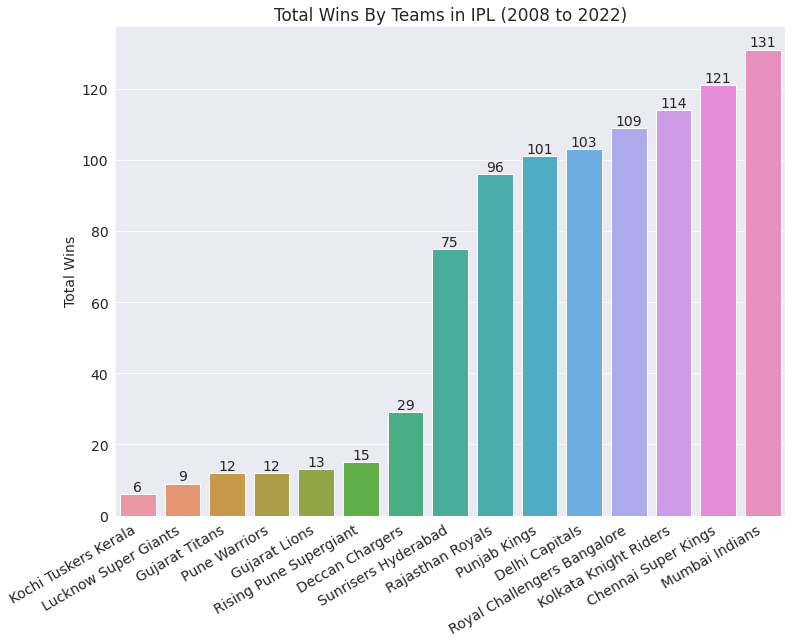

In [98]:
plt.figure(figsize=(12,9))
ax=plt.subplot()

g=sns.barplot(x=total_wins_df.index,y=total_wins_df.Total_Wins, order=total_wins_df.sort_values('Total_Wins').index)
for i in g.containers:
    g.bar_label(i)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Total Wins')
plt.title('Total Wins By Teams in IPL (2008 to 2022)')
plt.show();

***`Conclusion`***

The data above shows the total number of matches won by each team in the Indian Premier League (IPL) as of 2022. Based on the data, we can conclude:

1. Mumbai Indians have won the most number of matches, with a total of 131 wins.
2. Kochi Tuskers Kerala has won the least number of matches, with a total of only 6 wins.
3. The teams with the highest number of wins after Mumbai Indians are Chennai Super Kings (121) and Kolkata Knight Riders (114).
4. Gujarat Titans and Lucknow Super Giants have won the fewest matches, with only 12 and 9 wins respectively.

`Finding total losses by all teams throughout the IPL season (2008 - 2022)`

The function `total_losses` calculates the total number of matches lost by a given team by subtracting the total number of matches won from the total number of matches played by the team.

In [99]:
#function to find the total losses of a team
def total_losses(team_name):
    total_played=total_matches_played(team_name)
    total_wins=total_win(team_name)
    losses= total_played-total_wins
    return losses

In [100]:
for team in match_df.Team1.unique():
    print("The total matches lost by {}".format(team),"is:",total_losses(team))

The total matches lost by Rajasthan Royals is: 96
The total matches lost by Royal Challengers Bangalore is: 117
The total matches lost by Sunrisers Hyderabad is: 77
The total matches lost by Delhi Capitals is: 121
The total matches lost by Chennai Super Kings is: 87
The total matches lost by Gujarat Titans is: 4
The total matches lost by Lucknow Super Giants is: 6
The total matches lost by Kolkata Knight Riders is: 109
The total matches lost by Punjab Kings is: 117
The total matches lost by Mumbai Indians is: 100
The total matches lost by Rising Pune Supergiant is: 15
The total matches lost by Gujarat Lions is: 17
The total matches lost by Pune Warriors is: 34
The total matches lost by Deccan Chargers is: 46
The total matches lost by Kochi Tuskers Kerala is: 8


`Representing the total matches lost by all teams throughout the IPL season (2008-2022) in a data frame`.

Looping through each unique team name present in the `Team1` column using the `unique()` function of Pandas. For each team name, the `total_losses` function is called, passing the team name as an argument to calculate the total number of matches lost for that team. The result of the function call is then assigned as a value to the corresponding team name key in the `total_matches_lost_dict`.

Finally, the dictionary `total_matches_lost_dict` is used to create a new Pandas DataFrame named `total_matches_lost_df` using the `pd.DataFrame.from_dict()` method. The orientation of the DataFrame is set to `'index'` so that the team names become the row indices of the DataFrame, and the column name is set to `'total_losses'`.

In [101]:
total_matches_lost_dict={}
for team in match_df.Team1.unique():
        total_matches_lost_dict[team]=total_losses(team)
        
total_matches_lost_df=pd.DataFrame.from_dict(total_matches_lost_dict, orient='index', columns=['total_losses'])
total_matches_lost_df

,total_losses
Rajasthan Royals,96
Royal Challengers Bangalore,117
Sunrisers Hyderabad,77
Delhi Capitals,121
Chennai Super Kings,87
Gujarat Titans,4
Lucknow Super Giants,6
Kolkata Knight Riders,109
Punjab Kings,117
Mumbai Indians,100


***`Plotting the total matches lost by all team starting from IPL 2008 season to 2022 season.`***

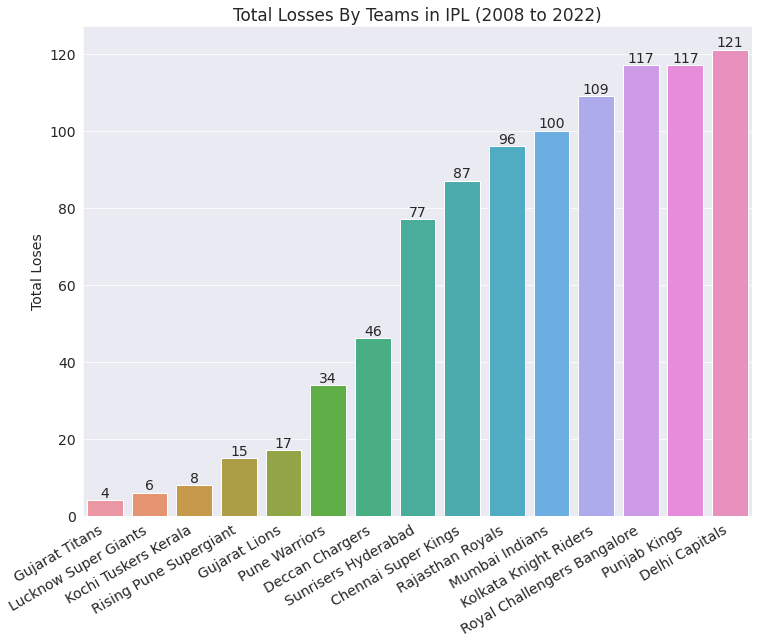

In [102]:
plt.figure(figsize=(12,9))
ax=plt.subplot()

g=sns.barplot(x=total_matches_lost_df.index,y=total_matches_lost_df.total_losses, order=total_matches_lost_df.sort_values('total_losses').index)
for i in g.containers:
    g.bar_label(i)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Total Loses')
plt.title('Total Losses By Teams in IPL (2008 to 2022)')
plt.show();

***`Conclusion`***

The data above shows the total number of matches lost by each team in the Indian Premier League (IPL) as of 2022. Based on the data, we can conclude:

1. Royal Challengers Bangalore have lost the most number of matches, with a total of 117 losses.
2. Gujarat Titans and Lucknow Super Giants have lost the fewest matches, with only 4 and 6 losses respectively.
3. The teams with the highest number of losses after Royal Challengers Bangalore are Delhi Capitals (121) and Kolkata Knight Riders (109).

`Finding Win Percentage of all teams throughout the IPL season (2008 - 2022)`

In [103]:
#function to find the win percentage of all teams
def win_percent(team_name):
    total_wins=total_win(team_name)
    total_played=total_matches_played(team_name)
    percent_win=(total_wins/total_played)*100
    return percent_win

In [104]:
for team in match_df.Team1.unique():
    print("The win percent of {}".format(team),"is:{:.2f}%".format(win_percent(team)))

The win percent of Rajasthan Royals is:50.00%
The win percent of Royal Challengers Bangalore is:48.23%
The win percent of Sunrisers Hyderabad is:49.34%
The win percent of Delhi Capitals is:45.98%
The win percent of Chennai Super Kings is:58.17%
The win percent of Gujarat Titans is:75.00%
The win percent of Lucknow Super Giants is:60.00%
The win percent of Kolkata Knight Riders is:51.12%
The win percent of Punjab Kings is:46.33%
The win percent of Mumbai Indians is:56.71%
The win percent of Rising Pune Supergiant is:50.00%
The win percent of Gujarat Lions is:43.33%
The win percent of Pune Warriors is:26.09%
The win percent of Deccan Chargers is:38.67%
The win percent of Kochi Tuskers Kerala is:42.86%


`Representing the win percent of all teams throughout the IPL season (2008-2022) in a data frame.`

In [105]:
win_percent_dict={}
for team in match_df.Team1.unique():
    win_percent_dict[team]=round(win_percent(team),2)
    
win_percent_df=pd.DataFrame.from_dict(win_percent_dict, orient='index', columns=['win_percent'])
win_percent_df

,win_percent
Rajasthan Royals,50.00
Royal Challengers Bangalore,48.23
Sunrisers Hyderabad,49.34
Delhi Capitals,45.98
Chennai Super Kings,58.17
Gujarat Titans,75.00
Lucknow Super Giants,60.00
Kolkata Knight Riders,51.12
Punjab Kings,46.33
Mumbai Indians,56.71


***`Plotting the win percent of all teams starting from IPL 2008 season to 2022 season.`***

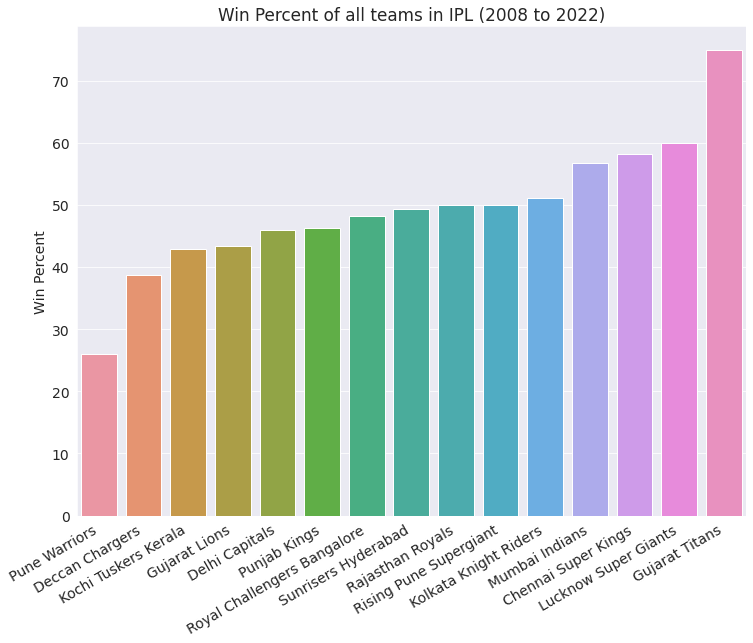

In [106]:
plt.figure(figsize=(12,9))
ax=plt.subplot()

sns.barplot(x=win_percent_df.index,y=win_percent_df.win_percent, order=win_percent_df.sort_values('win_percent').index)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Win Percent')
plt.title('Win Percent of all teams in IPL (2008 to 2022)')
plt.show();

***`Conclusion`***

The data above shows the win percentage of each team in the Indian Premier League (IPL) as of 2022. Based on the data, we can conclude:

1. Gujarat Titans have the highest win percentage, with a total of 75.00%.
2. Pune Warriors have the lowest win percentage, with a total of only 26.09%.
3. Mumbai Indians have the second-highest win percentage, with a total of 56.71%.
4. Some teams have a win percentage close to 50%, such as Rajasthan Royals (50.00%), Sunrisers Hyderabad (49.34%), and Rising Pune Supergiant (50.00%).
5. The win percentage of a team does not always correlate with the total number of matches won, as some teams with a lower number of wins have a higher win percentage than teams with more wins. For example, Gujarat Lions have won 13 matches with a win percentage of 43.33%, while Delhi Capitals have won 103 matches with a win percentage of 45.98%.

Finding `Loss Percentage` of all teams throughout the IPL season `(2008 - 2022)`

In [107]:
#function to find the loss percentage of all the teams
def loss_percent(team_name):
    total_lost=total_losses(team_name)
    total_played=total_matches_played(team_name)
    percent_loss=(total_lost/total_played)*100
    return percent_loss

In [108]:
for team in match_df.Team1.unique():
    print("The loss percentage of {}".format(team),"is: {:.2f}%".format(loss_percent(team)))

The loss percentage of Rajasthan Royals is: 50.00%
The loss percentage of Royal Challengers Bangalore is: 51.77%
The loss percentage of Sunrisers Hyderabad is: 50.66%
The loss percentage of Delhi Capitals is: 54.02%
The loss percentage of Chennai Super Kings is: 41.83%
The loss percentage of Gujarat Titans is: 25.00%
The loss percentage of Lucknow Super Giants is: 40.00%
The loss percentage of Kolkata Knight Riders is: 48.88%
The loss percentage of Punjab Kings is: 53.67%
The loss percentage of Mumbai Indians is: 43.29%
The loss percentage of Rising Pune Supergiant is: 50.00%
The loss percentage of Gujarat Lions is: 56.67%
The loss percentage of Pune Warriors is: 73.91%
The loss percentage of Deccan Chargers is: 61.33%
The loss percentage of Kochi Tuskers Kerala is: 57.14%


Representing the loss percent of all teams throughout the IPL season (2008-2022) in a data frame.

In [109]:
loss_percent_dict={}
for team in match_df.Team1.unique():
    loss_percent_dict[team]=round(loss_percent(team),2)
    
loss_percent_df=pd.DataFrame.from_dict(loss_percent_dict, orient='index', columns=['loss_percent'])
loss_percent_df

,loss_percent
Rajasthan Royals,50.00
Royal Challengers Bangalore,51.77
Sunrisers Hyderabad,50.66
Delhi Capitals,54.02
Chennai Super Kings,41.83
Gujarat Titans,25.00
Lucknow Super Giants,40.00
Kolkata Knight Riders,48.88
Punjab Kings,53.67
Mumbai Indians,43.29


***`Plotting the loss percent of all teams starting from IPL 2008 season to 2022 season.`***

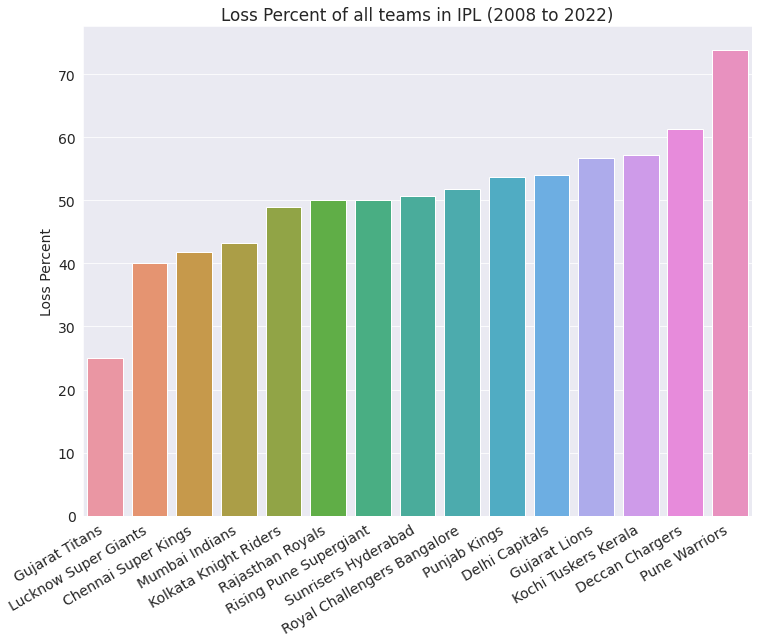

In [110]:
plt.figure(figsize=(12,9))
ax=plt.subplot()

sns.barplot(x=loss_percent_df.index,y=loss_percent_df.loss_percent, order=loss_percent_df.sort_values('loss_percent').index)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Loss Percent')
plt.title('Loss Percent of all teams in IPL (2008 to 2022)')
plt.show();

***`Conclusion`***

The data above shows the loss percentage of each team in the Indian Premier League (IPL) as of 2022. Based on the data, we can conclude:

1. Gujarat Titans have the lowest loss percentage, with a total of only 25.00%.
2. Pune Warriors have the highest loss percentage, with a total of 73.91%.
3. Chennai Super Kings have the second-lowest loss percentage, with a total of 41.83%.
4. Some teams have a loss percentage close to 50%, such as Rajasthan Royals (50.00%), Sunrisers Hyderabad (50.66%), and Rising Pune Supergiant (50.00%).
5. The loss percentage of a team does not always correlate with the total number of matches lost, as some teams with a higher number of losses have a lower loss percentage than teams with fewer losses. For example, Royal Challengers Bangalore have lost 117 matches with a loss percentage of 51.77%, while Delhi Capitals have lost 121 matches with a loss percentage of 54.02%.

`Finding the runs scored by all the teams in every match throughout the IPL season of 2008 to 2022 in order to find the maximum runs scored by all the teams.`

Creating a new Pandas DataFrame `run_scored_df` that shows the total runs scored by each unique combination of `ID`, `Season`, and `BattingTeam`. The aggregation function `sum` is used to calculate the total runs scored by each combination of `ID`, `Season`, and `BattingTeam`.

The `reset_index()` method is then used to reset the index of the DataFrame to a new sequential integer index.

In [111]:
run_scored_df=IPL_df.groupby(['ID','Season','BattingTeam']).agg(run_scored=('total_run','sum')).reset_index()

In [112]:
run_scored_df

,ID,Season,BattingTeam,run_scored
0,335982,2008,Kolkata Knight Riders,222
1,335982,2008,Royal Challengers Bangalore,82
2,335983,2008,Chennai Super Kings,240
3,335983,2008,Punjab Kings,207
4,335984,2008,Delhi Capitals,132
...,...,...,...,...
1893,1312198,2022,Royal Challengers Bangalore,207
1894,1312199,2022,Rajasthan Royals,161
1895,1312199,2022,Royal Challengers Bangalore,157
1896,1312200,2022,Gujarat Titans,133


`Maximum runs scored by all the teams throughout the IPL season (2008-2022).`

Creating a new Pandas DataFrame `max_runs_scored_by_team` that shows the maximum number of runs scored by each unique `BattingTeam`. The aggregation function `max` is used to calculate the maximum runs scored by each team based on the values in the `run_scored` column.

In [113]:
max_runs_scored_by_team=run_scored_df.groupby('BattingTeam').agg(max_run_scored=('run_scored','max')).reset_index()

In [114]:
max_runs_scored_by_team

,BattingTeam,max_run_scored
0,Chennai Super Kings,246
1,Deccan Chargers,214
2,Delhi Capitals,231
3,Gujarat Lions,208
4,Gujarat Titans,199
5,Kochi Tuskers Kerala,184
6,Kolkata Knight Riders,245
7,Lucknow Super Giants,211
8,Mumbai Indians,235
9,Pune Warriors,192


***`Plotting the maximum runs scored by all the teams throughout the IPL season (2008-2022).`***

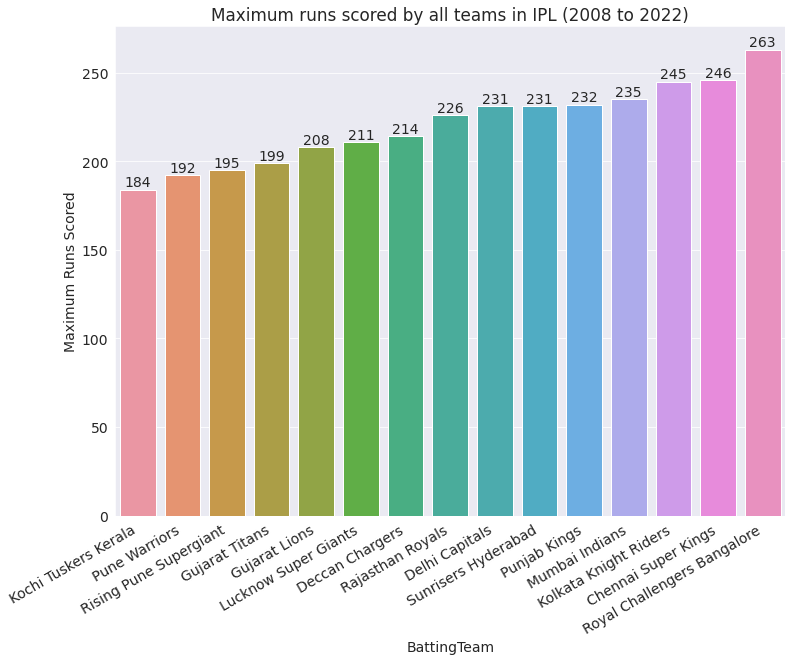

In [115]:
plt.figure(figsize=(12,9))
ax=plt.subplot()

g=sns.barplot(x='BattingTeam',y='max_run_scored', data=max_runs_scored_by_team, order=max_runs_scored_by_team.sort_values('max_run_scored').BattingTeam)
for i in g.containers:
    g.bar_label(i)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Maximum Runs Scored')
plt.title('Maximum runs scored by all teams in IPL (2008 to 2022)')
plt.show();

***`Conclusion`***

The data above shows the maximum runs scored by each team in a single match in the Indian Premier League (IPL) as of 2022. Based on the data, we can conclude:

1. Royal Challengers Bangalore have the highest maximum runs scored by a team in a single match, with a score of 263.
2. Kolkata Knight Riders have the second-highest maximum runs scored by a team in a single match, with a score of 245.
3. Chennai Super Kings, Delhi Capitals, Mumbai Indians, and Punjab Kings have all scored more than 230 runs in a single match.
4. Kochi Tuskers Kerala have the lowest maximum runs scored by a team in a single match, with a score of 184.
5. The maximum runs scored by a team in a single match does not always correlate with the overall performance of the team in the IPL, as some teams with lower maximum runs scored have performed better overall.

`Finding the maximum run scoring team in every season throughout the IPL season of 2008 to 2022.`

In [116]:
max_run_scored_seasonwise=run_scored_df.groupby('Season').agg(max_run_scored=('run_scored','max')).reset_index()

In [117]:
max_run_scored_seasonwise

,Season,max_run_scored
0,2008,240
1,2009,211
2,2010,246
3,2011,232
4,2012,222
5,2013,263
6,2014,231
7,2015,235
8,2016,248
9,2017,230


Creating a new Pandas DataFrame named `max_run_scoring_team`. It first filters the `run_scored_df` DataFrame to include only those rows where the value in the `run_scored` column matches the maximum value of runs scored in each season, as calculated earlier in the `max_runs_scored_by_team` DataFrame. This is achieved by using the `isin()` method and passing in the `max_run_scored_seasonwise.max_run_scored` column.

The resulting DataFrame is then grouped by `Season` and `BattingTeam`, and the `max()` function is applied to the `run_scored` column to calculate the maximum runs scored by each team in each season. The resulting DataFrame is sorted by `Season` and `max_run` in descending order, using the `sort_values()` method.

In [118]:
max_run_scoring_team=run_scored_df[run_scored_df['run_scored'].isin(max_run_scored_seasonwise.max_run_scored)].groupby(['Season','BattingTeam']).agg(max_run=('run_scored','max')).reset_index().sort_values(by=['Season','max_run'], ascending=False)

Modifying the existing `max_run_scoring_team` DataFrame by grouping it by the `Season` column using the `groupby()` method. The `agg()` method is then used to apply multiple aggregation functions to different columns of the DataFrame. 

The `max()` function is applied to the `max_run` column to calculate the maximum runs scored by any team in each season. The `first()` function is applied to the `BattingTeam` column to select the first team name for each season, as the DataFrame is already sorted in descending order of `max_run` in order to filter the highest run scorer of each season. 

In [119]:
max_run_scoring_team=max_run_scoring_team.groupby('Season', sort=True).agg({'max_run':'max','BattingTeam':'first'}).reset_index()

In [120]:
print("Maximum run scoring team in each IPL season (2008 - 2022)")
max_run_scoring_team

Maximum run scoring team in each IPL season (2008 - 2022)


,Season,max_run,BattingTeam
0,2008,240,Chennai Super Kings
1,2009,211,Rajasthan Royals
2,2010,246,Chennai Super Kings
3,2011,232,Punjab Kings
4,2012,222,Chennai Super Kings
5,2013,263,Royal Challengers Bangalore
6,2014,231,Punjab Kings
7,2015,235,Royal Challengers Bangalore
8,2016,248,Royal Challengers Bangalore
9,2017,230,Punjab Kings


***`Plotting the maximum run scoring team in each IPL season (2008 - 2022)`***

Creating a bar plot using Seaborn library. It takes the data from the `max_run_scoring_team` dataframe, which contains the maximum runs scored by a team in each season of the IPL. The x-axis of the plot represents the IPL season, and the y-axis represents the maximum runs scored by a team in that season. The bars are colored based on the team that scored the runs. The code also adds labels to the bars showing the maximum runs scored by each team in each season. Finally, the code sets the axis labels and the plot title, and shows the plot.

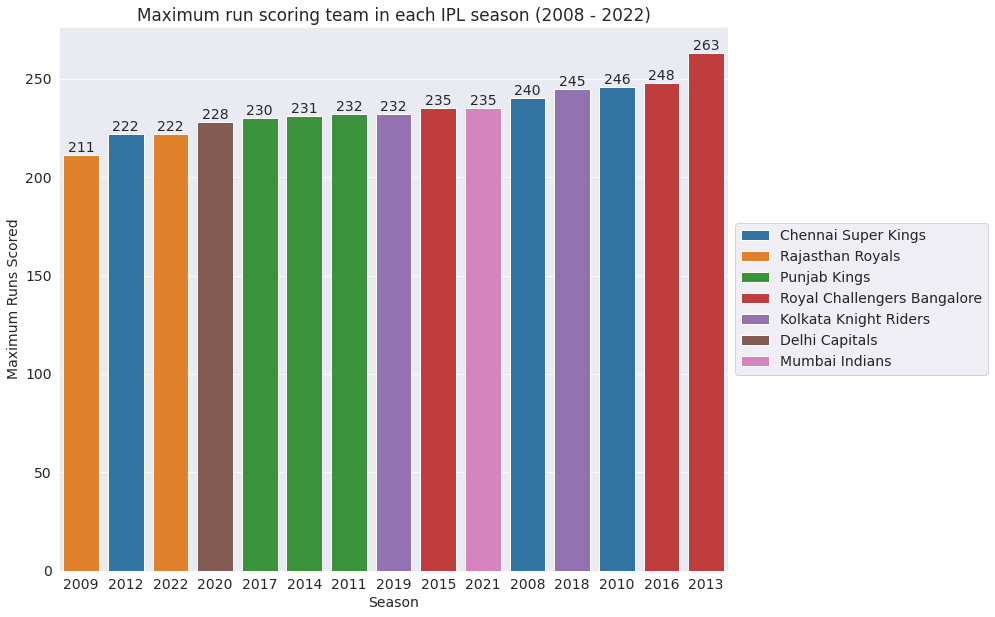

In [121]:
plt.figure(figsize=(12,10))

g=sns.barplot(x='Season',y='max_run', data=max_run_scoring_team, hue='BattingTeam', dodge=False ,order=max_run_scoring_team.sort_values('max_run').Season)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in g.containers:
    g.bar_label(i)
plt.ylabel('Maximum Runs Scored')
plt.title('Maximum run scoring team in each IPL season (2008 - 2022)')
plt.show();

***`Conclusion`***

The data above shows the highest total runs scored by a team in each season of the IPL. Some conclusions that can be drawn from this data are:

- The highest total runs scored by a team in a single IPL season has been increasing over the years, with the highest being 263 by Royal Challengers Bangalore in 2013.
- Chennai Super Kings, Royal Challengers Bangalore, Punjab Kings, Kolkata Knight Riders and Rajasthan Royals are the only teams to have scored the highest total runs more than once, with Chennai Super Kings, Punjab Kings and Royal Challengers Bangalore achieving this feat thrice and Kolkata Knight Riders, Rajasthan Royals twice.
- No team has been able to score 250 or more runs in a single innings in the IPL so far, with the highest being 263 by Royal Challengers Bangalore in 2013.

`Comparing the total wins of every with the total number of matches played.`

In order to do so we must have a dataframe that has the team name along with the total matches played and total matches won.

We will be using the data frames `total_matches_df` and `total_wins_df` that were already created and merge them into a single dataframe to get the data frame we desire.

In [122]:
print("Total Matches Played By All Teams")
total_matches_df

Total Matches Played By All Teams


,Total_Matches_Played
Rajasthan Royals,192
Royal Challengers Bangalore,226
Sunrisers Hyderabad,152
Delhi Capitals,224
Chennai Super Kings,208
Gujarat Titans,16
Lucknow Super Giants,15
Kolkata Knight Riders,223
Punjab Kings,218
Mumbai Indians,231


In [123]:
print("Total Matches Won By All Teams")
total_wins_df

Total Matches Won By All Teams


,Total_Wins
Rajasthan Royals,96
Royal Challengers Bangalore,109
Sunrisers Hyderabad,75
Delhi Capitals,103
Chennai Super Kings,121
Gujarat Titans,12
Lucknow Super Giants,9
Kolkata Knight Riders,114
Punjab Kings,101
Mumbai Indians,131


`Merging the two dataframes into one.`

Merging two DataFrames, `total_matches_df` and `total_wins_df`, using the `merge()` method. The `inner` join method is used to join the two DataFrames on the common key, which is the index of the `total_matches_df` DataFrame.

In [124]:
wins_played_df=total_matches_df.merge(total_wins_df, how='inner', on=total_matches_df.index)

In [125]:
wins_played_df.rename(columns={'key_0':'Team'},inplace=True)

In [126]:
wins_played_df

,Team,Total_Matches_Played,Total_Wins
0,Rajasthan Royals,192,96
1,Royal Challengers Bangalore,226,109
2,Sunrisers Hyderabad,152,75
3,Delhi Capitals,224,103
4,Chennai Super Kings,208,121
5,Gujarat Titans,16,12
6,Lucknow Super Giants,15,9
7,Kolkata Knight Riders,223,114
8,Punjab Kings,218,101
9,Mumbai Indians,231,131


***`Plotting the total matches played vs total matches won in a scatter plot to understand the distribution of matches won and matches played.`***

Creating a scatter plot using Seaborn library to show the relationship between the total number of matches played and the total number of matches won by each team. Each data point in the scatter plot represents a team, and its position is determined by its total matches played and total matches won. The size of the data points is fixed at 200, and the color represents the team. The legend on the right side shows the mapping of the color to the team name. 

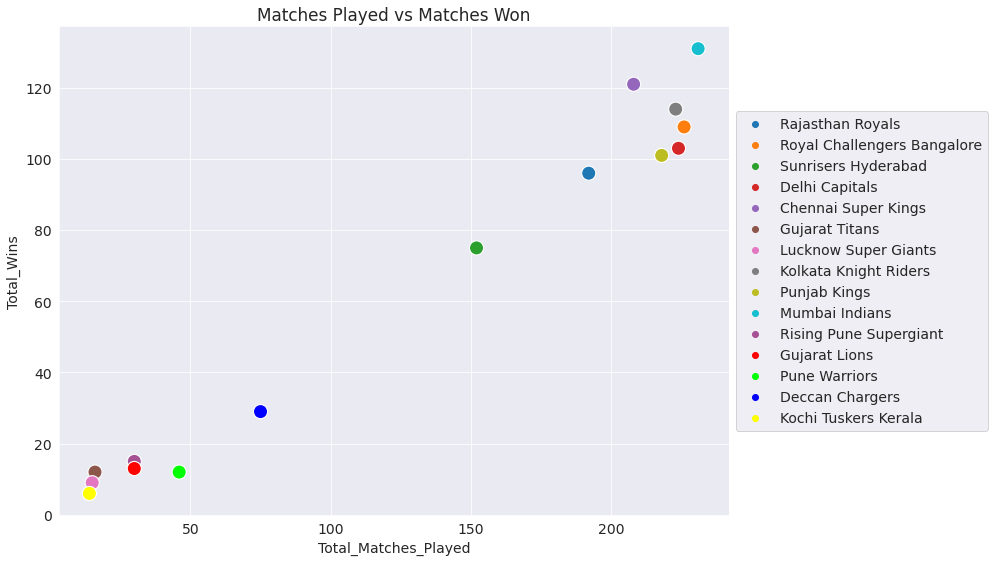

In [127]:
plt.figure(figsize=(12,9))
# Define a custom color palette with 15 colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
                  '#17becf', '#a55194', '#ff0000', '#00ff00', '#0000ff', '#ffff00']

# Use the custom palette in the scatterplot function
g = sns.scatterplot(x=wins_played_df.Total_Matches_Played, y=wins_played_df.Total_Wins, hue=wins_played_df.Team,
                    s=200, palette=custom_palette)

# Set the legend outside the plot
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Matches Played vs Matches Won");

**From the above scatter plot we can conclude that some teams such as** ***`Mumbai Indians` and `Chennai Super Kings`*** **have a high number of Total_Wins compared to Total_Matches_Played, indicating a good win-loss ratio and successful performance in the IPL.**

**Meanwhile, some teams such as** ***`Pune Warriors` and `Kochi Tuskers Kerala`*** **have a lower number of Total_Wins compared to Total_Matches_Played, indicating a poor win-loss ratio and less successful performance in the IPL.**



***`Analyzing the team's performance across different seasons and identify the teams that perform consistently over time.`***

The `seasonal_matches_played` function takes three arguments:
- `season`: a string representing the season of the IPL matches (e.g. "2008", "2009", etc.)
- `team`: a string representing the name of the IPL team
- `data`: a pandas DataFrame containing the IPL match data

The function first filters the `data` DataFrame to include only the matches played in the given `season` and where the given `team` was either Team1 or Team2. It then counts the number of rows in the resulting DataFrame to obtain the total number of matches played by the team in the season. The function returns this count as output.

In [128]:
#function to find the total seasonal matches played by each team
def seasonal_matches_played(season,team,data):
    df1=data[data.Season==season].Team1==team
    df2=data[data.Season==season].Team2==team
    total=df1.sum()+df2.sum()
    return total

The `seasonal_matches_won` function takes three arguments:
- `season`: a string representing the season of the IPL matches (e.g. "2008", "2009", etc.)
- `team`: a string representing the name of the IPL team
- `data`: a pandas DataFrame containing the IPL match data

The function first filters the DataFrame to select the rows corresponding to the specified `season`, and then checks how many times the `team` has won in those matches by counting the number of rows where the `WinningTeam` column is equal to the `team`. Finally, it returns the total number of matches won by the team in that season.

In [129]:
#function to find the total seasonal matches won by each team
def seasonal_matches_won(season,team,data):
    win_df=data[data.Season==season].WinningTeam==team
    total_win=win_df.sum()
    return total_win

The `seasonal_matches_won` function takes three arguments:
- `season`: a string representing the season of the IPL matches (e.g. "2008", "2009", etc.)
- `team`: a string representing the name of the IPL team
- `data`: a pandas DataFrame containing the IPL match data

The function first calculates the total number of matches played by the given team in the given season using the `seasonal_matches_played` function. It then calculates the total number of matches won by the team in the given season using the `seasonal_matches_won` function.

If the total number of matches played is zero, the function returns 0 as the win percentage, since it is impossible to calculate a win percentage with no matches played. Otherwise, the function calculates the win percentage and rounding the result to two decimal places using the `round` function.

In [130]:
#function to find the total seasonal win percent of each team
def seasonal_win_percent(season,team,data):
    total_seasonal_wins=seasonal_matches_won(season,team,data)
    total_seasonal_matches_played=seasonal_matches_played(season,team,data)
    if total_seasonal_matches_played==0:
        return 0
    else:
        percent_win=round((total_seasonal_wins/total_seasonal_matches_played)*100,2)
        return percent_win

***Creating a dictionary called `team_seasonal_stats` that will contain the seasonal stats for each team***.

This code generates a list of dictionaries containing the seasonal performance statistics for each team. It iterates over all the unique team names in the `Team1` column of the `match_df` dataframe and then over all the unique season names in the `Season` column. For each team and season combination, it calculates the number of matches played, the number of matches won, and the win percentage. These statistics are stored in a dictionary called `stats`. The `stats` dictionary is then appended to the `team_seasonal_stats` list. Finally, when all team and season combinations have been iterated over, the `team_seasonal_stats` list contains a list of dictionaries, with each dictionary representing the seasonal performance statistics for a particular team and season.

In [131]:
team_seasonal_stats = []
for team in match_df.Team1.unique():
    for season in match_df.Season.unique():
        stats = {
            'Team': team,
            'Season': season,
            'Matches_played': seasonal_matches_played(season, team, match_df),
            'Matches_won': seasonal_matches_won(season, team, match_df),
            'Win_percent': seasonal_win_percent(season, team, match_df)
        }
        team_seasonal_stats.append(stats)


`Converting the dictionary to a dataframe.`

In [132]:
team_seasonal_stats_df=pd.DataFrame(team_seasonal_stats)

In [133]:
team_seasonal_stats_df

,Team,Season,Matches_played,Matches_won,Win_percent
0,Rajasthan Royals,2022,17,10,58.82
1,Rajasthan Royals,2021,14,5,35.71
2,Rajasthan Royals,2020,14,6,42.86
3,Rajasthan Royals,2019,14,5,35.71
4,Rajasthan Royals,2018,15,7,46.67
...,...,...,...,...,...
220,Kochi Tuskers Kerala,2012,0,0,0.00
221,Kochi Tuskers Kerala,2011,14,6,42.86
222,Kochi Tuskers Kerala,2010,0,0,0.00
223,Kochi Tuskers Kerala,2009,0,0,0.00


`Creating a pivot table on Season, Team and Matches Played in IPL season (2008-2022)`

Using the `pivot()` method of a pandas DataFrame to reshape the data and creating a new DataFrame where the rows are the unique values of the 'Team' column, the columns are the unique values of the 'Season' column, and the values are the 'Matches_played' for each team and season combination.

The resulting DataFrame shows the total number of matches played by each team in each IPL season.

In [134]:
team_seasonal_stats_df.pivot('Team','Season','Matches_played')

Season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Team,,,,,,,,,,,,,,,
Chennai Super Kings,16,14,16,16,18,18,16,17,0,0,16,17,14,16,14
Deccan Chargers,14,16,16,14,15,0,0,0,0,0,0,0,0,0,0
Delhi Capitals,14,15,14,14,18,16,14,14,14,14,14,16,17,16,14
Gujarat Lions,0,0,0,0,0,0,0,0,16,14,0,0,0,0,0
Gujarat Titans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
Kochi Tuskers Kerala,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0
Kolkata Knight Riders,13,13,14,15,17,16,16,13,15,16,16,14,14,17,14
Lucknow Super Giants,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
Mumbai Indians,14,13,16,16,17,19,15,16,14,17,14,16,16,14,14


**`Plotting a heatmap of number of matches played by all teams in IPL season (2008-2022)`**

Generating a heatmap using Seaborn library to visualize the number of matches played by each team in every season of the IPL (2008-2022). The heatmap is plotted using the `heatmap()` function, with annotations to show the exact number of matches played in each cell. The `linewidths` parameter controls the width of the lines that separate each cell, and the `cmap` parameter specifies the color map used for the heatmap. Finally, the `xticks()` function is used to rotate the x-axis labels vertically for better readability.

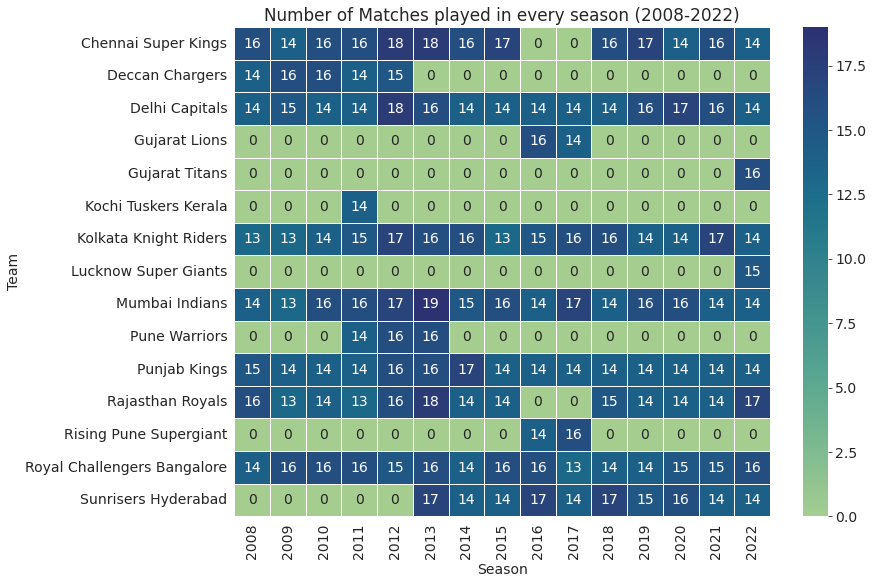

In [135]:
plt.figure(figsize=(12,9))

plt.title("Number of Matches played in every season (2008-2022)")
sns.heatmap(team_seasonal_stats_df.pivot('Team','Season','Matches_played'), annot=True, linewidths=.5, cmap='crest')
plt.xticks(rotation='vertical');

***Conclusion:***
    
    1) Chennai Super Kings have played the most matches, followed by the Mumbai Indians and Royal Challengers Bangalore.
    
    2) Some teams like the Deccan Chargers, Gujarat Lions, Gujarat Titans, Kochi Tuskers Kerala, Lucknow Super Giants, and 
    Pune Warriors have played only a limited number of seasons or no seasons at all.
    
    3) Chennai Super Kings and Rajasthan Royal did not play 2016 and 2017 IPL season only, but have participated in all 
    other seasons.
    
    4) Sunrisers Hyderabad played their first IPL season in 2013 and have played 107 matches so far.

`Creating a pivot table on Season, Team and Matches Won in IPL season (2008-2022)`

In [136]:
team_seasonal_stats_df.pivot('Team','Season','Matches_won')

Season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Team,,,,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10,6,11,4
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0,0,0,0
Delhi Capitals,7,10,7,4,11,3,2,5,7,6,5,10,9,10,7
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0,0,0,0
Gujarat Titans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6,7,9,6
Lucknow Super Giants,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11,11,7,4


**`Plotting a heatmap of number of seasonal matches won by all team in IPL season (2008-2022)`**

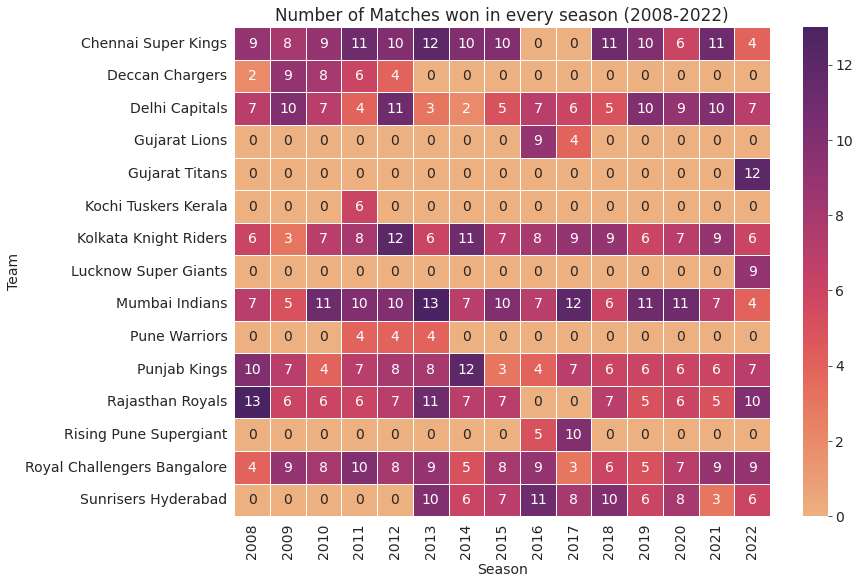

In [137]:
plt.figure(figsize=(12,9))

plt.title("Number of Matches won in every season (2008-2022)")
sns.heatmap(team_seasonal_stats_df.pivot('Team','Season','Matches_won'), annot=True, linewidths=.5, cmap='flare')
plt.xticks(rotation='vertical');

***`Conclusion`***
    
    1) Chennai Super Kings and Mumbai Indians have been the most consistent teams with high number of match wins in every season. However, they were not able to play in 2016 and 2017 due to a two-year suspension imposed by the IPL governing council.
    
    2) Sunrisers Hyderabad, the newest team in the IPL, has been consistently successful since its inception in 2013.
    
    3) Gujrat Titans which got introduced in 2022 has a high number of wins despite being a new franchise.

`Creating a pivot table on Season, Team and Win Percentage in IPL season (2008-2022)`

In [138]:
team_seasonal_stats_df.pivot('Team','Season','Win_percent')

Season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Team,,,,,,,,,,,,,,,
Chennai Super Kings,56.25,57.14,56.25,68.75,55.56,66.67,62.50,58.82,0.00,0.00,68.75,58.82,42.86,68.75,28.57
Deccan Chargers,14.29,56.25,50.00,42.86,26.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Delhi Capitals,50.00,66.67,50.00,28.57,61.11,18.75,14.29,35.71,50.00,42.86,35.71,62.50,52.94,62.50,50.00
Gujarat Lions,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,56.25,28.57,0.00,0.00,0.00,0.00,0.00
Gujarat Titans,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75.00
Kochi Tuskers Kerala,0.00,0.00,0.00,42.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Kolkata Knight Riders,46.15,23.08,50.00,53.33,70.59,37.50,68.75,53.85,53.33,56.25,56.25,42.86,50.00,52.94,42.86
Lucknow Super Giants,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,60.00
Mumbai Indians,50.00,38.46,68.75,62.50,58.82,68.42,46.67,62.50,50.00,70.59,42.86,68.75,68.75,50.00,28.57


**`Plotting a heatmap of number of seasonal win percentage of all teams in IPL season (2008-2022)`**

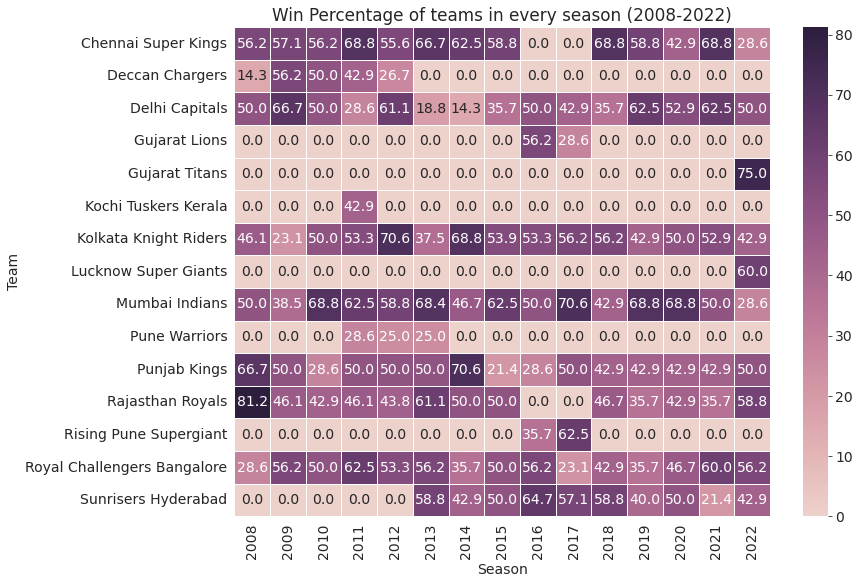

In [139]:
plt.figure(figsize=(12,9))

color_map=sns.cubehelix_palette(as_cmap=True)
plt.title("Win Percentage of teams in every season (2008-2022)")
sns.heatmap(team_seasonal_stats_df.pivot('Team','Season','Win_percent'), fmt='.1f',annot=True, linewidths=.5, cmap=color_map)
plt.xticks(rotation='vertical');

***`Conclusion`***

    1) Chennai Super Kings have been consistently successful over the years, with high win percentages in several seasons.
    
    2) Other teams like Mumbai Indians, Kolkata Knight Riders, and Rajasthan Royals have also been successful in several seasons.
    
    3) The win percentages of RCB suggests that they have not been able to maintain a consistent level of performance throughout the years, and have had their ups and downs. However, they have also shown that they are capable of performing well and winning matches in some seasons.
    
    4) The win percentages of KKR range from as low as 23.1% to as high as 70.6%, which is a considerable difference. However, it is worth noting that they have had some strong seasons with win percentages of over 50%, which is a good sign. Overall, while their consistency is not the strongest, they have had some successful seasons.

***`Performance Across Venues: Analyzing the team's performance across different venues to identify the teams that perform better in certain conditions.`***

Looking at all the venues to find if there are any redundancies.

In [140]:
print("Count of unique values in Venue column 'Before' removing redundancy")
match_df.Venue.nunique()

Count of unique values in Venue column 'Before' removing redundancy


49

In [141]:
match_df.Venue.unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Wankhede Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket A

Some stadiums in the list appears to have been entered multiple times with slight variations in their names, leading to confusion about whether they are separate venues or not. For example, the `Rajiv Gandhi International Stadium` is listed as both `"Rajiv Gandhi International Stadium"` and `"Rajiv Gandhi International Stadium, Uppal,"` despite being the same stadium. 

There are other stadiums as well which have the same variations making them look like separate venues despite being the same.

So we need to first remove these redundancies by giving the same name to stadiums that are same but have slight variation.

Replacing all occurrences of the value in `to_replace` in the 'match_df' dataframe with the value in `value`.

In [142]:
match_df.replace(to_replace='Rajiv Gandhi International Stadium, Uppal', value='Rajiv Gandhi International Stadium', inplace=True)
match_df.replace(to_replace='Eden Gardens, Kolkata', value='Eden Gardens', inplace=True)
match_df.replace(to_replace='Brabourne Stadium, Mumbai', value='Brabourne Stadium', inplace=True)
match_df.replace(to_replace='Wankhede Stadium, Mumbai', value='Wankhede Stadium', inplace=True)
match_df.replace(to_replace='Dr DY Patil Sports Academy, Mumbai', value='Dr DY Patil Sports Academy', inplace=True)
match_df.replace(to_replace='Maharashtra Cricket Association Stadium, Pune', value='Maharashtra Cricket Association Stadium', inplace=True)
match_df.replace(to_replace='Arun Jaitley Stadium, Delhi', value='Arun Jaitley Stadium', inplace=True)
match_df.replace(to_replace='MA Chidambaram Stadium, Chepauk, Chennai', value='MA Chidambaram Stadium', inplace=True)
match_df.replace(to_replace='MA Chidambaram Stadium, Chepauk', value='MA Chidambaram Stadium', inplace=True)
match_df.replace(to_replace='Punjab Cricket Association IS Bindra Stadium', value='Punjab Cricket Association Stadium', inplace=True)
match_df.replace(to_replace='Punjab Cricket Association Stadium, Mohali', value='Punjab Cricket Association Stadium', inplace=True)
match_df.replace(to_replace='Punjab Cricket Association IS Bindra Stadium, Mohali', value='Punjab Cricket Association Stadium', inplace=True)
match_df.replace(to_replace='M.Chinnaswamy Stadium', value='M Chinnaswamy Stadium', inplace=True)
match_df.replace(to_replace='M.Chinnaswamy Stadium', value='M Chinnaswamy Stadium', inplace=True)
match_df.replace(to_replace='Zayed Cricket Stadium, Abu Dhabi', value='Zayed Cricket Stadium', inplace=True)
match_df.replace(to_replace='Sheikh Zayed Stadium', value='Zayed Cricket Stadium', inplace=True)


Match venues after removing the redundancies.

In [143]:
match_df.Venue.unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens',
       'Wankhede Stadium', 'Brabourne Stadium',
       'Dr DY Patil Sports Academy',
       'Maharashtra Cricket Association Stadium',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium', 'Arun Jaitley Stadium',
       'MA Chidambaram Stadium', 'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association Stadium', 'M Chinnaswamy Stadium',
       'Sawai Mansingh Stadium', 'Holkar Cricket Stadium',
       'Feroz Shah Kotla', 'Green Park',
       'Saurashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Subrata Roy Sahara Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha'

In [144]:
print("Count of unique values in Venue column 'After' removing redundancy")
match_df.Venue.nunique()

Count of unique values in Venue column 'After' removing redundancy


36

In [145]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,Non D/L,JC Buttler,CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,Non D/L,RM Patidar,J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,Non D/L,DA Miller,BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Non D/L,Harpreet Brar,AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,Non D/L,DJ Hussey,BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,Non D/L,MV Boucher,SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2008,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Capitals,Wickets,9.0,Non D/L,MF Maharoof,Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2008,2,Punjab Kings,Chennai Super Kings,Punjab Cricket Association Stadium,Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,Non D/L,MEK Hussey,MR Benson,SL Shastri


In [146]:
#function to find the total matches played by a team in a particular venue
def matches_played_venuewise(venue,team,data):
    df1=data[data.Venue==venue].Team1==team
    df2=data[data.Venue==venue].Team2==team
    total=df1.sum()+df2.sum()
    return total

In [147]:
#function to find the total matches won by a team in a particular venue
def matches_won_venuewise(venue,team,data):
    win_df=data[data.Venue==venue].WinningTeam==team
    total_win=win_df.sum()
    return total_win

***Creating a dictionary called `team_venuewise_stats` that will contain the venue wise stats for each team***.

In [148]:
team_venuewise_stats = []
for team in match_df.Team1.unique():
    for venue in match_df.Venue.unique():
        stats = {
            'Team': team,
            'Venue': venue,
            'Matches_played': matches_played_venuewise(venue, team, match_df),
            'Matches_won': matches_won_venuewise(venue, team, match_df)
        }
        team_venuewise_stats.append(stats)

In [149]:
team_venuewise_stats

[{'Team': 'Rajasthan Royals',
  'Venue': 'Narendra Modi Stadium, Ahmedabad',
  'Matches_played': 2,
  'Matches_won': 1},
 {'Team': 'Rajasthan Royals',
  'Venue': 'Eden Gardens',
  'Matches_played': 10,
  'Matches_won': 2},
 {'Team': 'Rajasthan Royals',
  'Venue': 'Wankhede Stadium',
  'Matches_played': 18,
  'Matches_won': 9},
 {'Team': 'Rajasthan Royals',
  'Venue': 'Brabourne Stadium',
  'Matches_played': 7,
  'Matches_won': 5},
 {'Team': 'Rajasthan Royals',
  'Venue': 'Dr DY Patil Sports Academy',
  'Matches_played': 6,
  'Matches_won': 2},
 {'Team': 'Rajasthan Royals',
  'Venue': 'Maharashtra Cricket Association Stadium',
  'Matches_played': 5,
  'Matches_won': 3},
 {'Team': 'Rajasthan Royals',
  'Venue': 'Dubai International Cricket Stadium',
  'Matches_played': 10,
  'Matches_won': 2},
 {'Team': 'Rajasthan Royals',
  'Venue': 'Sharjah Cricket Stadium',
  'Matches_played': 6,
  'Matches_won': 2},
 {'Team': 'Rajasthan Royals',
  'Venue': 'Zayed Cricket Stadium',
  'Matches_played':

In [150]:
#converting the dictionary into a Dataframe
team_venuewise_stats_df=pd.DataFrame(team_venuewise_stats)

In [151]:
team_venuewise_stats_df

,Team,Venue,Matches_played,Matches_won
0,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",2,1
1,Rajasthan Royals,Eden Gardens,10,2
2,Rajasthan Royals,Wankhede Stadium,18,9
3,Rajasthan Royals,Brabourne Stadium,7,5
4,Rajasthan Royals,Dr DY Patil Sports Academy,6,2
...,...,...,...,...
535,Kochi Tuskers Kerala,OUTsurance Oval,0,0
536,Kochi Tuskers Kerala,St George's Park,0,0
537,Kochi Tuskers Kerala,De Beers Diamond Oval,0,0
538,Kochi Tuskers Kerala,Buffalo Park,0,0


***`Plotting a heatmap of number of matches played by each team in all the venues.`***

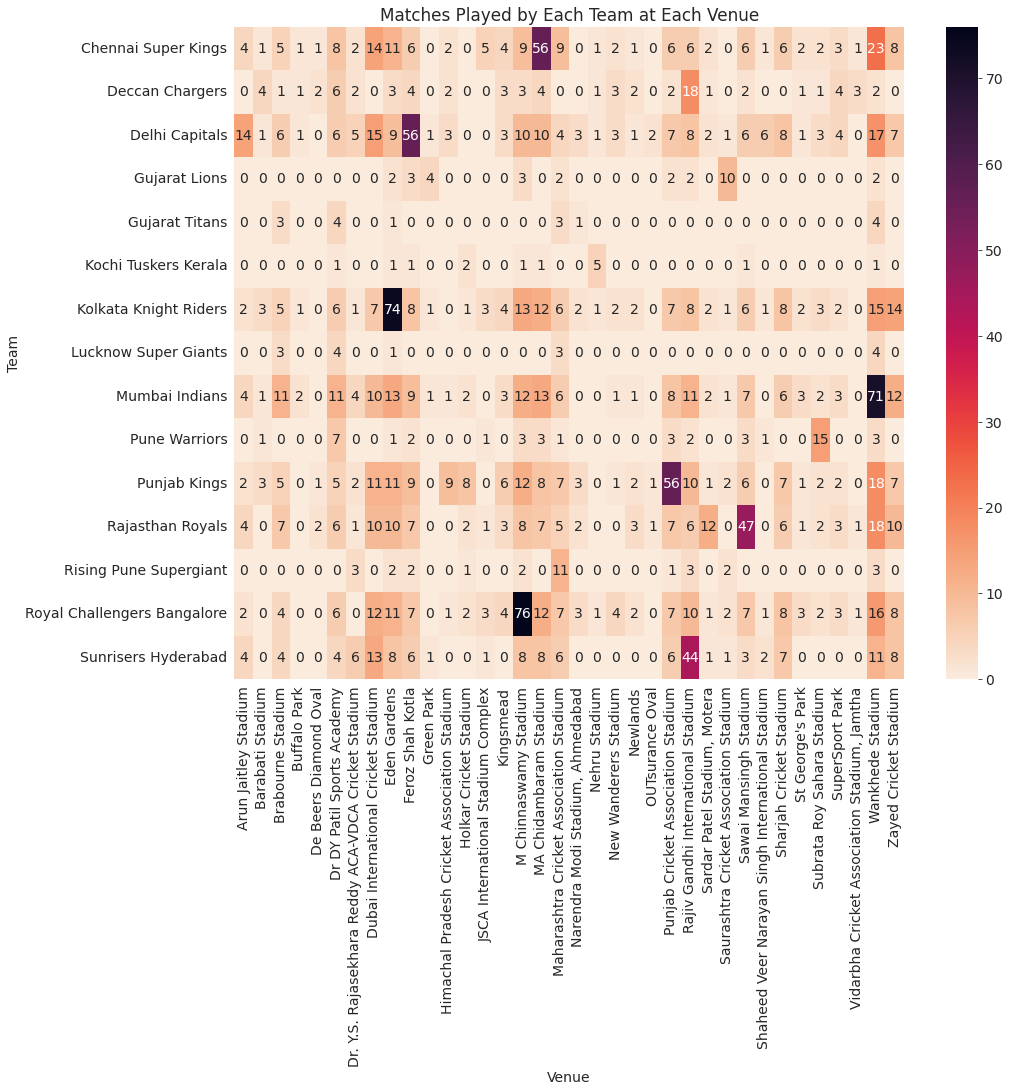

In [152]:
plt.figure(figsize=(15,12))

sns.heatmap(team_venuewise_stats_df.pivot('Team','Venue','Matches_played'), annot=True,cmap='rocket_r')
plt.title('Matches Played by Each Team at Each Venue');

***`Conclusion`***

- The highest number of matches played by any team in IPL is in their respective home ground.
- Royal Challengers Bangalore has played the most matches in its home ground, followed by Kolkata Knight Riders and Mumbai Indians
- Teams such as Gujarat Lions, Gujarat Titans, Lucknow Super Giants, Pune Warriors, Rising Pune Supergiant, and Deccan Chargers have had fewer opportunities to play in their respective home grounds compared to other teams. This is primarily due to the fact that some of these teams are no longer in existence or were recently introduced to the league.

**`Plotting a heatmap of`** ***`"Win Percentage"`*** **`of each team in all the venues`**`.` 

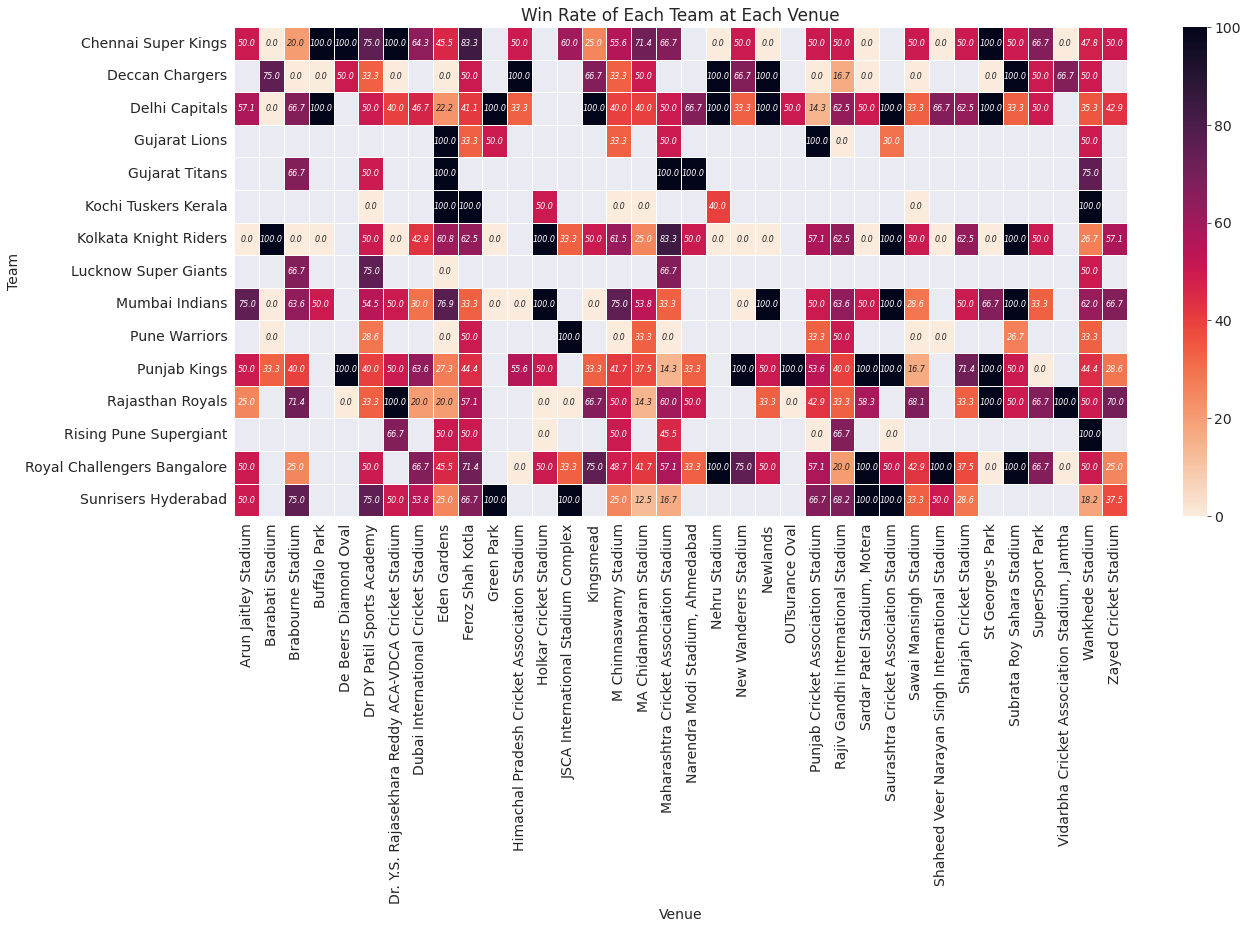

In [153]:
# creating a new column in the dataframe that calculates the ratio of matches won to matches played
team_venuewise_stats_df['Win_Rate'] = team_venuewise_stats_df['Matches_won'] / team_venuewise_stats_df['Matches_played']*100

# creating a pivot table with rows for each team and columns for each venue
team_venuewise_pivot = team_venuewise_stats_df.pivot('Team', 'Venue', 'Win_Rate')

# creating a heatmap of the win rate pivot table
plt.figure(figsize=(20, 9))
sns.heatmap(team_venuewise_pivot, fmt='.1f',annot=True, linewidths=.5,cmap='rocket_r',annot_kws={"fontsize":8, "fontstyle":"italic"})
plt.title('Win Rate of Each Team at Each Venue')
plt.show()


***`Conclusion`***

- In terms of matches played by teams in home ground Chennai Super Kings has the higest win percentage and Royal Challengers Bangalore has the lowest win percent with less than 50% win.
- Playing matches in home ground cannot be termed as the most important contributing factor for high win chances for all teams of IPL.
- Chennai Super Kings and Mumbai Indians have consistently maintained a commendable win percentage of over 50% across most venues, ensuring a fair record throughout their matches.

**`Finding`** ***`Head-to-Head`*** **`encounter of each team over matches won against each other`**.

In [154]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,Non D/L,JC Buttler,CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,Non D/L,RM Patidar,J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,Non D/L,DA Miller,BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Non D/L,Harpreet Brar,AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,Non D/L,DJ Hussey,BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,Non D/L,MV Boucher,SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2008,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Capitals,Wickets,9.0,Non D/L,MF Maharoof,Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2008,2,Punjab Kings,Chennai Super Kings,Punjab Cricket Association Stadium,Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,Non D/L,MEK Hussey,MR Benson,SL Shastri


The `match_df` data frame has a column `'WinningTeam'` and we need to add one more column `'WonAgainst'` in order to get the win count to every team against each other.

Adding a new column called `WonAgainst` to the `match_df` DataFrame. The value in this column represents the team that the winning team (i.e., `WinningTeam`) won against in the match. 

A lambda function is applied to each row in the DataFrame. If the `WinningTeam` value in the row is equal to `Team1`, then the `WonAgainst` value is set to the `Team2` value. Otherwise, if the `WinningTeam` value is equal to `Team2`, then the `WonAgainst` value is set to the `Team1` value.

In [155]:
match_df['WonAgainst'] = match_df.apply(lambda x: x['Team2'] if x['WinningTeam'] == x['Team1'] else x['Team1'], axis=1)

In [156]:
print("match_df data frame after adding the 'WonAgainst' column")
match_df

match_df data frame after adding the 'WonAgainst' column


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2,WonAgainst
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon,Rajasthan Royals
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,Non D/L,JC Buttler,CB Gaffaney,Nitin Menon,Royal Challengers Bangalore
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,Non D/L,RM Patidar,J Madanagopal,MA Gough,Lucknow Super Giants
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,Non D/L,DA Miller,BNJ Oxenford,VK Sharma,Rajasthan Royals
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Non D/L,Harpreet Brar,AK Chaudhary,NA Patwardhan,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,Non D/L,DJ Hussey,BF Bowden,K Hariharan,Deccan Chargers
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,Non D/L,MV Boucher,SJ Davis,DJ Harper,Mumbai Indians
947,335984,Delhi,2008-04-19,2008,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Capitals,Wickets,9.0,Non D/L,MF Maharoof,Aleem Dar,GA Pratapkumar,Rajasthan Royals
948,335983,Chandigarh,2008-04-19,2008,2,Punjab Kings,Chennai Super Kings,Punjab Cricket Association Stadium,Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,Non D/L,MEK Hussey,MR Benson,SL Shastri,Punjab Kings


In [157]:
head_to_head_df=match_df[['WinningTeam','WonAgainst']].groupby(['WinningTeam','WonAgainst']).agg(win_count=('WonAgainst','count')).reset_index()

In [158]:
head_to_head_df

,WinningTeam,WonAgainst,win_count
0,Chennai Super Kings,Deccan Chargers,6
1,Chennai Super Kings,Delhi Capitals,17
2,Chennai Super Kings,Kochi Tuskers Kerala,1
3,Chennai Super Kings,Kolkata Knight Riders,17
4,Chennai Super Kings,Mumbai Indians,14
...,...,...,...
140,Sunrisers Hyderabad,Pune Warriors,2
141,Sunrisers Hyderabad,Punjab Kings,13
142,Sunrisers Hyderabad,Rajasthan Royals,8
143,Sunrisers Hyderabad,Rising Pune Supergiant,1


In [159]:
head_to_head_pivot=head_to_head_df.pivot('WinningTeam','WonAgainst','win_count')

In [160]:
head_to_head_pivot

WonAgainst,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Lions,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad
WinningTeam,,,,,,,,,,,,,,,
Chennai Super Kings,NaN,6.0,17.0,NaN,NaN,1.0,17.0,NaN,14.0,4.0,15.0,15.0,NaN,19.0,13.0
Deccan Chargers,4.0,NaN,4.0,NaN,NaN,1.0,2.0,NaN,4.0,3.0,3.0,2.0,NaN,6.0,NaN
Delhi Capitals,10.0,7.0,NaN,3.0,NaN,1.0,14.0,NaN,15.0,3.0,15.0,13.0,2.0,10.0,10.0
Gujarat Lions,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,2.0,NaN,3.0,2.0,NaN
Gujarat Titans,2.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,3.0,NaN,1.0,1.0
Kochi Tuskers Kerala,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
Kolkata Knight Riders,9.0,7.0,16.0,1.0,NaN,NaN,NaN,NaN,9.0,4.0,20.0,14.0,3.0,16.0,15.0
Lucknow Super Giants,1.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0
Mumbai Indians,20.0,6.0,17.0,2.0,1.0,NaN,22.0,NaN,NaN,5.0,15.0,14.0,2.0,17.0,10.0


***`Plotting a heatmap of Head-to-Head encounter of each team over matches won against each other.`***

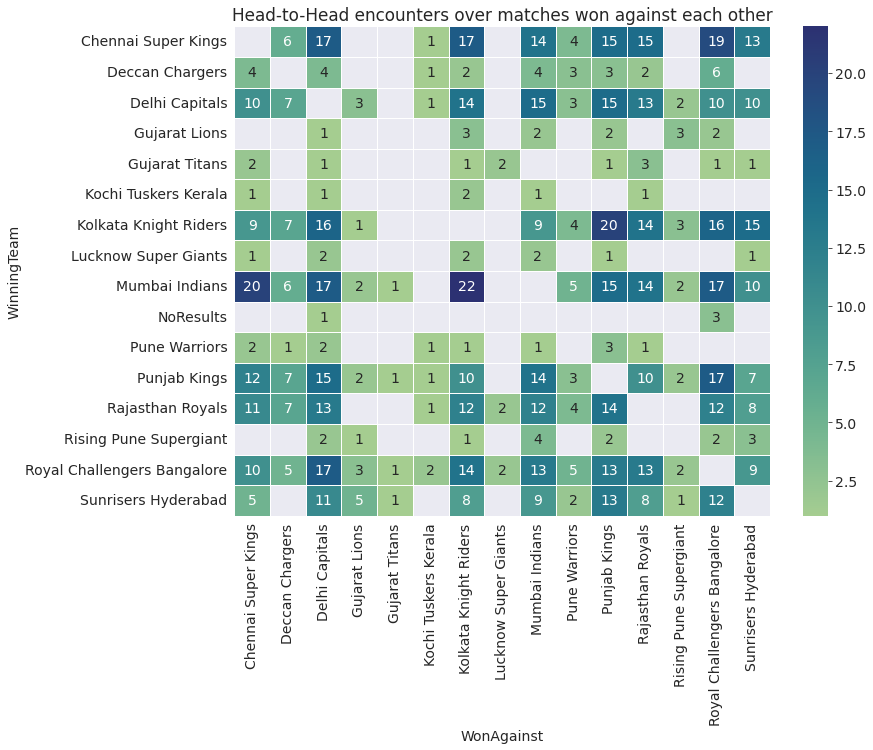

In [161]:
plt.figure(figsize=(12,9))
plt.title("Head-to-Head encounters over matches won against each other")
sns.heatmap(head_to_head_pivot, annot=True, linewidths=.5,cmap=sns.color_palette("crest", as_cmap=True));

***`Conclusion`***
    
    1) Mumbai Indians has won the most matches against other teams, with highest number of win against Kolkata Knight Riders.
    
    2) Royal Challengers Bangalore has played against the most number of teams and have won the most matches against Delhi Capitals.
    
    3) Chennai Super Kings has also won high number of matches against most of the teams with highest win against Royal Challengers Bangalore.
    
    4) Kolkata Knight Riders performs best against Punjab Kings, Royal Challengers Bangalore, Delhi Capitals and Sunrisers Hyderabad.

***`Finding the total number of times each team has reached the play-offs.`***

In [162]:
match_df.MatchNumber.unique()

array(['Final', 'Qualifier 2', 'Eliminator', 'Qualifier 1', '70', '69',
       '68', '67', '66', '65', '64', '63', '62', '61', '60', '59', '58',
       '57', '56', '55', '54', '53', '52', '51', '50', '49', '48', '47',
       '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36',
       '35', '34', '33', '32', '31', '30', '29', '28', '27', '26', '25',
       '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14',
       '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2',
       '1', 'Qualifier', 'Elimination Final', '72', '71',
       '3rd Place Play-Off', 'Semi Final'], dtype=object)

Filtering the `match_df` DataFrame to include only those matches that are playoffs. The condition to filter out the playoffs matches is that the `MatchNumber` column must contain any of the following strings - 'Qualifier 1', 'Eliminator', 'Elimination Final', 'Semi Final' or 'Qualifier' as the playoff matches are denoted with these strings. The resulting filtered DataFrame is then stored in a new DataFrame called `playoffs_df`. The `reset_index()` method is called on this new DataFrame to reset the index of the DataFrame to start from 0.

In [163]:
playoffs_df=match_df[(match_df.MatchNumber=='Qualifier 1') | (match_df.MatchNumber=='Eliminator') | (match_df.MatchNumber=='Elimination Final') | (match_df.MatchNumber=='Semi Final') | (match_df.MatchNumber=='Qualifier')].reset_index(drop=True)

In [164]:
playoffs_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2,WonAgainst
0,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,Non D/L,RM Patidar,J Madanagopal,MA Gough,Lucknow Super Giants
1,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,Non D/L,DA Miller,BNJ Oxenford,VK Sharma,Rajasthan Royals
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,Non D/L,SP Narine,CB Gaffaney,VK Sharma,Royal Challengers Bangalore
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,Non D/L,RD Gaikwad,Nitin Menon,RK Illingworth,Delhi Capitals
4,1237178,Abu Dhabi,2020-11-06,2020,Eliminator,Royal Challengers Bangalore,Sunrisers Hyderabad,Zayed Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,6.0,Non D/L,KS Williamson,PR Reiffel,S Ravi,Royal Challengers Bangalore
5,1237177,Dubai,2020-11-05,2020,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,Non D/L,JJ Bumrah,CB Gaffaney,Nitin Menon,Delhi Capitals
6,1181767,Visakhapatnam,2019-05-10,2019,Qualifier,Delhi Capitals,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,Non D/L,F du Plessis,BNJ Oxenford,S Ravi,Delhi Capitals
7,1181766,Visakhapatnam,2019-05-08,2019,Eliminator,Sunrisers Hyderabad,Delhi Capitals,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Delhi Capitals,field,N,Delhi Capitals,Wickets,2.0,Non D/L,RR Pant,BNJ Oxenford,S Ravi,Sunrisers Hyderabad
8,1181764,Chennai,2019-05-07,2019,Qualifier,Chennai Super Kings,Mumbai Indians,MA Chidambaram Stadium,Chennai Super Kings,bat,N,Mumbai Indians,Wickets,6.0,Non D/L,SA Yadav,NJ Llong,Nitin Menon,Chennai Super Kings
9,1136619,Kolkata,2018-05-25,2018,Qualifier,Sunrisers Hyderabad,Kolkata Knight Riders,Eden Gardens,Kolkata Knight Riders,field,N,Sunrisers Hyderabad,Runs,14.0,Non D/L,Rashid Khan,HDPK Dharmasena,Nitin Menon,Kolkata Knight Riders


The `playoffs_df` is a data frame that contains information about the first two matches of the play-offs in the IPL tournament. It is used to find the number of times a team has reached the playoffs by considering only the top four teams from the league stage across all IPL seasons. 

Since we are considering only the first two matches of the play-offs, the data frame will have two entries for each season.

However, for the seasons 2018 and 2019, there are three entries instead of two because the Qualifier 1 and Qualifier 2 matches have been labeled as "Qualifier". Therefore, we need to manually delete the third entry for 2018 and 2019 (i.e., Qualifier 2 matches) using the index of these rows as a reference.

`Checking the index of the rows to be deleted.`

In [165]:
playoffs_df[(playoffs_df.Season==2018) | (playoffs_df.Season==2019)]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2,WonAgainst
6,1181767,Visakhapatnam,2019-05-10,2019,Qualifier,Delhi Capitals,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,Non D/L,F du Plessis,BNJ Oxenford,S Ravi,Delhi Capitals
7,1181766,Visakhapatnam,2019-05-08,2019,Eliminator,Sunrisers Hyderabad,Delhi Capitals,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Delhi Capitals,field,N,Delhi Capitals,Wickets,2.0,Non D/L,RR Pant,BNJ Oxenford,S Ravi,Sunrisers Hyderabad
8,1181764,Chennai,2019-05-07,2019,Qualifier,Chennai Super Kings,Mumbai Indians,MA Chidambaram Stadium,Chennai Super Kings,bat,N,Mumbai Indians,Wickets,6.0,Non D/L,SA Yadav,NJ Llong,Nitin Menon,Chennai Super Kings
9,1136619,Kolkata,2018-05-25,2018,Qualifier,Sunrisers Hyderabad,Kolkata Knight Riders,Eden Gardens,Kolkata Knight Riders,field,N,Sunrisers Hyderabad,Runs,14.0,Non D/L,Rashid Khan,HDPK Dharmasena,Nitin Menon,Kolkata Knight Riders
10,1136618,Kolkata,2018-05-23,2018,Eliminator,Kolkata Knight Riders,Rajasthan Royals,Eden Gardens,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,25.0,Non D/L,AD Russell,AK Chaudhary,Nitin Menon,Rajasthan Royals
11,1136617,Mumbai,2018-05-22,2018,Qualifier,Sunrisers Hyderabad,Chennai Super Kings,Wankhede Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,2.0,Non D/L,F du Plessis,C Shamshuddin,M Erasmus,Sunrisers Hyderabad


`Deleting the rows from the "playoffs_df" data frame and resetting the index to keep the index ordered.`

In [166]:
playoffs_df.drop([6, 9], inplace=True)
playoffs_df.reset_index(drop=True, inplace=True)

In [167]:
playoffs_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2,WonAgainst
0,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,Non D/L,RM Patidar,J Madanagopal,MA Gough,Lucknow Super Giants
1,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,Non D/L,DA Miller,BNJ Oxenford,VK Sharma,Rajasthan Royals
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,Non D/L,SP Narine,CB Gaffaney,VK Sharma,Royal Challengers Bangalore
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,Non D/L,RD Gaikwad,Nitin Menon,RK Illingworth,Delhi Capitals
4,1237178,Abu Dhabi,2020-11-06,2020,Eliminator,Royal Challengers Bangalore,Sunrisers Hyderabad,Zayed Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,6.0,Non D/L,KS Williamson,PR Reiffel,S Ravi,Royal Challengers Bangalore
5,1237177,Dubai,2020-11-05,2020,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,Non D/L,JJ Bumrah,CB Gaffaney,Nitin Menon,Delhi Capitals
6,1181766,Visakhapatnam,2019-05-08,2019,Eliminator,Sunrisers Hyderabad,Delhi Capitals,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Delhi Capitals,field,N,Delhi Capitals,Wickets,2.0,Non D/L,RR Pant,BNJ Oxenford,S Ravi,Sunrisers Hyderabad
7,1181764,Chennai,2019-05-07,2019,Qualifier,Chennai Super Kings,Mumbai Indians,MA Chidambaram Stadium,Chennai Super Kings,bat,N,Mumbai Indians,Wickets,6.0,Non D/L,SA Yadav,NJ Llong,Nitin Menon,Chennai Super Kings
8,1136618,Kolkata,2018-05-23,2018,Eliminator,Kolkata Knight Riders,Rajasthan Royals,Eden Gardens,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,25.0,Non D/L,AD Russell,AK Chaudhary,Nitin Menon,Rajasthan Royals
9,1136617,Mumbai,2018-05-22,2018,Qualifier,Sunrisers Hyderabad,Chennai Super Kings,Wankhede Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,2.0,Non D/L,F du Plessis,C Shamshuddin,M Erasmus,Sunrisers Hyderabad


In [168]:
#function to find the number of times a team has reached the playoffs
def playoffs_count(team):
    df1=playoffs_df.Team1==team
    df2=playoffs_df.Team2==team
    total=df1.sum()+df2.sum()
    return total

In [169]:
print("Total number of times a team has reached playoffs till IPL season 2022")
print()
for team in match_df.Team1.unique():
    print("{} has reached the play-offs".format(team),"{} times".format(playoffs_count(team)))

Total number of times a team has reached playoffs till IPL season 2022

Rajasthan Royals has reached the play-offs 5 times
Royal Challengers Bangalore has reached the play-offs 8 times
Sunrisers Hyderabad has reached the play-offs 6 times
Delhi Capitals has reached the play-offs 6 times
Chennai Super Kings has reached the play-offs 11 times
Gujarat Titans has reached the play-offs 1 times
Lucknow Super Giants has reached the play-offs 1 times
Kolkata Knight Riders has reached the play-offs 7 times
Punjab Kings has reached the play-offs 2 times
Mumbai Indians has reached the play-offs 9 times
Rising Pune Supergiant has reached the play-offs 1 times
Gujarat Lions has reached the play-offs 1 times
Pune Warriors has reached the play-offs 0 times
Deccan Chargers has reached the play-offs 2 times
Kochi Tuskers Kerala has reached the play-offs 0 times


In [170]:
#creating an empty list of play=offs count
playoffs_count_list=[]
#iterating the for loop over all the teams in IPL
for team in match_df.Team1.unique():
    #creating a dictionary with team name and no. of times a team reached playoffs
    playoffs_count_dict={'team' : team,
                         'playoffs_reached' : playoffs_count(team)
                        }
    #creating a list of dictionaries with team name and no. of times a team reached playoffs
    playoffs_count_list.append(playoffs_count_dict)
#displaying the list of dictionaries
playoffs_count_list

[{'team': 'Rajasthan Royals', 'playoffs_reached': 5},
 {'team': 'Royal Challengers Bangalore', 'playoffs_reached': 8},
 {'team': 'Sunrisers Hyderabad', 'playoffs_reached': 6},
 {'team': 'Delhi Capitals', 'playoffs_reached': 6},
 {'team': 'Chennai Super Kings', 'playoffs_reached': 11},
 {'team': 'Gujarat Titans', 'playoffs_reached': 1},
 {'team': 'Lucknow Super Giants', 'playoffs_reached': 1},
 {'team': 'Kolkata Knight Riders', 'playoffs_reached': 7},
 {'team': 'Punjab Kings', 'playoffs_reached': 2},
 {'team': 'Mumbai Indians', 'playoffs_reached': 9},
 {'team': 'Rising Pune Supergiant', 'playoffs_reached': 1},
 {'team': 'Gujarat Lions', 'playoffs_reached': 1},
 {'team': 'Pune Warriors', 'playoffs_reached': 0},
 {'team': 'Deccan Chargers', 'playoffs_reached': 2},
 {'team': 'Kochi Tuskers Kerala', 'playoffs_reached': 0}]

In [171]:
#converting the list of dictionaries to a dataframe
playoffs_count_df=pd.DataFrame(playoffs_count_list)

In [172]:
playoffs_count_df

,team,playoffs_reached
0,Rajasthan Royals,5
1,Royal Challengers Bangalore,8
2,Sunrisers Hyderabad,6
3,Delhi Capitals,6
4,Chennai Super Kings,11
5,Gujarat Titans,1
6,Lucknow Super Giants,1
7,Kolkata Knight Riders,7
8,Punjab Kings,2
9,Mumbai Indians,9


***`Plotting the count of each team reaching playoffs in IPL season 2008 to 2022`.***

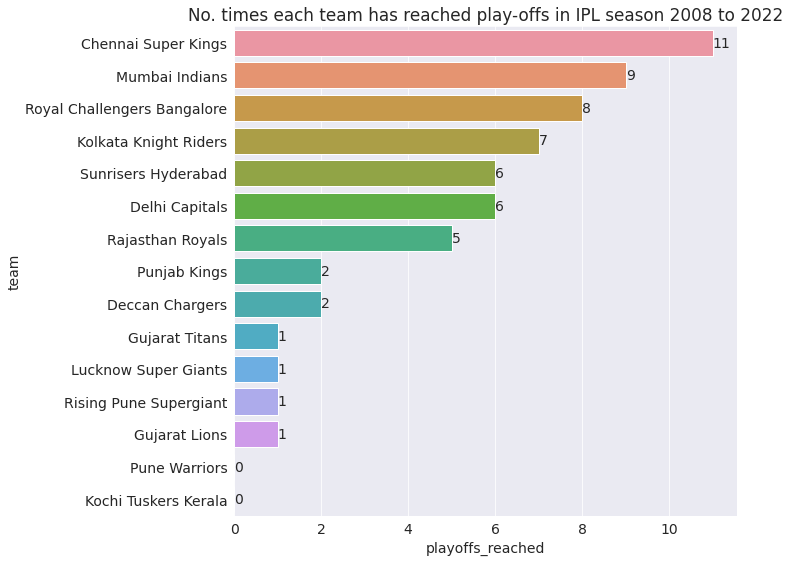

In [173]:
plt.figure(figsize=(9,9))

g=sns.barplot(x='playoffs_reached',y='team',data=playoffs_count_df, 
              order=playoffs_count_df.sort_values('playoffs_reached', ascending=False).team)
for i in g.containers:
    g.bar_label(i)

plt.title("No. times each team has reached play-offs in IPL season 2008 to 2022");

***`Conclusion`***
    
       1. Chennai Super Kings (CSK) has reached the playoffs of the Indian Premier League (IPL) the most number of times,
       with a total of 11 appearances.

       2. Mumbai Indians (MI) is the team that has qualified for the playoffs the second-most number of times, with a total 
       of 9 appearances.

       3. Royal Challengers Bangalore (RCB) has qualified for the playoffs the third-most number of times, with a total of 
       8 appearances.

       4. Rajasthan Royals (RR) has qualified for the playoffs 5 times, while Sunrisers Hyderabad (SRH) and Delhi Capitals 
       (DC) have qualified for the playoffs 6 times each.

       5. Teams such as Pune Warriors and Kochi Tuskers Kerala have never reached the playoffs, while other teams like 
       Gujarat Lions and Rising Pune Supergiant have reached the playoffs only once.

***`Finding the total number of times a team has played the final and won it.`***

Creating a new DataFrame called `final_match_df` that only contains data from the final matches of each IPL season.

In [174]:
final_match_df=match_df[match_df.MatchNumber=='Final']

In [175]:
final_match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Umpire1,Umpire2,WonAgainst
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,Non D/L,HH Pandya,CB Gaffaney,Nitin Menon,Rajasthan Royals
74,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,Non D/L,F du Plessis,Nitin Menon,RK Illingworth,Kolkata Knight Riders
134,1237181,Dubai,2020-11-10,2020,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,Non D/L,TA Boult,CB Gaffaney,Nitin Menon,Delhi Capitals
194,1181768,Hyderabad,2019-05-12,2019,Final,Mumbai Indians,Chennai Super Kings,Rajiv Gandhi International Stadium,Mumbai Indians,bat,N,Mumbai Indians,Runs,1.0,Non D/L,JJ Bumrah,IJ Gould,Nitin Menon,Chennai Super Kings
254,1136620,Mumbai,2018-05-27,2018,Final,Sunrisers Hyderabad,Chennai Super Kings,Wankhede Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,8.0,Non D/L,SR Watson,M Erasmus,S Ravi,Sunrisers Hyderabad
314,1082650,Hyderabad,2017-05-21,2017,Final,Mumbai Indians,Rising Pune Supergiant,Rajiv Gandhi International Stadium,Mumbai Indians,bat,N,Mumbai Indians,Runs,1.0,Non D/L,KH Pandya,NJ Llong,S Ravi,Rising Pune Supergiant
373,981019,Bangalore,2016-05-29,2016,Final,Royal Challengers Bangalore,Sunrisers Hyderabad,M Chinnaswamy Stadium,Sunrisers Hyderabad,bat,N,Sunrisers Hyderabad,Runs,8.0,Non D/L,BCJ Cutting,HDPK Dharmasena,BNJ Oxenford,Royal Challengers Bangalore
433,829823,Kolkata,2015-05-24,2015,Final,Mumbai Indians,Chennai Super Kings,Eden Gardens,Chennai Super Kings,field,N,Mumbai Indians,Runs,41.0,Non D/L,RG Sharma,HDPK Dharmasena,RK Illingworth,Chennai Super Kings
492,734049,Bangalore,2014-06-01,2014,Final,Kolkata Knight Riders,Punjab Kings,M Chinnaswamy Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,Non D/L,MK Pandey,HDPK Dharmasena,BNJ Oxenford,Punjab Kings
552,598073,Kolkata,2013-05-26,2013,Final,Chennai Super Kings,Mumbai Indians,Eden Gardens,Mumbai Indians,bat,N,Mumbai Indians,Runs,23.0,Non D/L,KA Pollard,HDPK Dharmasena,SJA Taufel,Chennai Super Kings


In [176]:
#function to find the number of times a team had played the finals
def final_matches_played(team):
    df1=final_match_df.Team1==team
    df2=final_match_df.Team2==team
    total=df1.sum() + df2.sum()
    return total

In [177]:
#function to find the number of times a team has won the finals
def final_matches_won(team):
    df1=final_match_df.WinningTeam==team
    total =df1.sum()
    return total

In [178]:
final_played_won=[]
for team in match_df.Team1.unique():
    played_won={'team' : team,
                'finals_played' : final_matches_played(team),
                'finals_won' : final_matches_won(team)
               }
    final_played_won.append(played_won)
    
final_played_won

[{'team': 'Rajasthan Royals', 'finals_played': 2, 'finals_won': 1},
 {'team': 'Royal Challengers Bangalore', 'finals_played': 3, 'finals_won': 0},
 {'team': 'Sunrisers Hyderabad', 'finals_played': 2, 'finals_won': 1},
 {'team': 'Delhi Capitals', 'finals_played': 1, 'finals_won': 0},
 {'team': 'Chennai Super Kings', 'finals_played': 9, 'finals_won': 4},
 {'team': 'Gujarat Titans', 'finals_played': 1, 'finals_won': 1},
 {'team': 'Lucknow Super Giants', 'finals_played': 0, 'finals_won': 0},
 {'team': 'Kolkata Knight Riders', 'finals_played': 3, 'finals_won': 2},
 {'team': 'Punjab Kings', 'finals_played': 1, 'finals_won': 0},
 {'team': 'Mumbai Indians', 'finals_played': 6, 'finals_won': 5},
 {'team': 'Rising Pune Supergiant', 'finals_played': 1, 'finals_won': 0},
 {'team': 'Gujarat Lions', 'finals_played': 0, 'finals_won': 0},
 {'team': 'Pune Warriors', 'finals_played': 0, 'finals_won': 0},
 {'team': 'Deccan Chargers', 'finals_played': 1, 'finals_won': 1},
 {'team': 'Kochi Tuskers Kerala',

In [179]:
final_played_won_df=pd.DataFrame(final_played_won)

In [180]:
final_played_won_df

,team,finals_played,finals_won
0,Rajasthan Royals,2,1
1,Royal Challengers Bangalore,3,0
2,Sunrisers Hyderabad,2,1
3,Delhi Capitals,1,0
4,Chennai Super Kings,9,4
5,Gujarat Titans,1,1
6,Lucknow Super Giants,0,0
7,Kolkata Knight Riders,3,2
8,Punjab Kings,1,0
9,Mumbai Indians,6,5


***`Plotting the number of finals played and won by each team till IPL season 2022.`***

Generating a stacked bar plot using Seaborn library to show the number of times each team has played and won the Indian Premier League (IPL) finals.

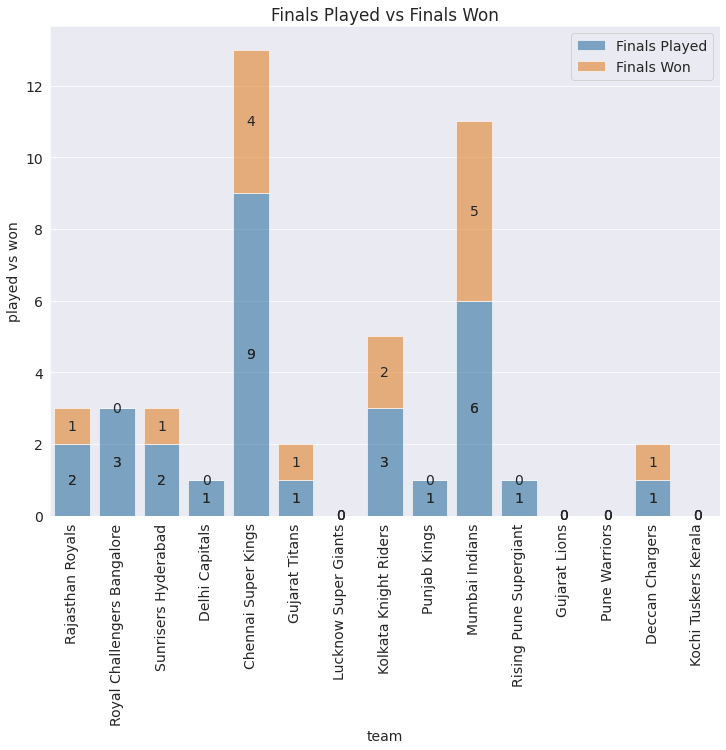

In [181]:
plt.figure(figsize=(12,9))

g=sns.barplot(x='team', y='finals_played', data=final_played_won_df, color='#1f77b4', alpha=0.6, label='Finals Played')
for i in g.containers:
    g.bar_label(i, label_type='center')
g1=sns.barplot(x='team', y='finals_won', data=final_played_won_df, color='#ff7f0e', alpha=0.6, 
            bottom=final_played_won_df['finals_played'], label='Finals Won')
for i in g1.containers:
    g1.bar_label(i, label_type='center')

plt.ylabel("played vs won")
plt.legend()
plt.title("Finals Played vs Finals Won")
plt.xticks(rotation=90);

***`Conclusion`***

1. Chennai Super Kings have played the most finals, which is 9, and have won 4 out of them.

2. Mumbai Indians have the highest number of final wins, which is 5, out of the 6 finals they have played in.

3. Rajasthan Royals, Sunrisers Hyderabad, and Deccan Chargers have won 1 final each out of the 2 finals they have played.

4. Royal Challengers Bangalore, Punjab Kings, Rising Pune Supergiant, Gujarat Lions, Lucknow Super Giants, and Kochi Tuskers Kerala have never won an IPL final.

5. Kolkata Knight Riders have won 2 out of the 3 finals they have played in.

6. Pune Warriors and Gujarat Lions have never played in an IPL final.

7. Delhi Capitals have played in only one final and lost it.

Let us save and upload our work to Jovian before continuing

In [182]:
import jovian

In [183]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "skimteyajali1998/ipl-data-analysis-2008-to-2022" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/skimteyajali1998/ipl-data-analysis-2008-to-2022


'https://jovian.com/skimteyajali1998/ipl-data-analysis-2008-to-2022'

## Asking and Answering Questions

In this section we will be posing questions to the dataframe and fetching answers to those questions.

The questions that we will be posing are as follows:

    1) Top 10 batsmen (Runs scored)
    
    2) Highest run scoring batsmen in each season
    
    3) Highest 4 hitters (Top 10)
    
    4) Highest 4 hitters season wise
    
    5) Highest 6 hitters (Top 10)
    
    6) Highest 6 hitters season wise
    
    7) Top 10 wicket taking bowlers
    
    8) Highest wicket takers season wise
    
    9) Highest player of the match award
    
    10) Top 10 payer of the match award winners
    
    11) Highest player of the match award winners season wise
    
    12) Total matches played in each venue


#### Q1: Who are the top 10 batsmen on the basis of runs scored?

Creatign a new DataFrame named `batsman_total_score` by grouping the `IPL_df` DataFrame by each unique value in the `batter` column. The `sum` function to the `batsman_run` column for each group and aggregates the results into a new column called `total_runs`. The resulting DataFrame has three columns: `batter`, `total_runs`, and a default index column.

In [184]:
batsman_total_score= IPL_df.groupby('batter').agg(total_runs=('batsman_run','sum')).reset_index()

Sorting the `batsman_total_score` dataframe in descending order of `total_runs` using the `sort_values()` method, and then selecting the top 10 rows using the `head()` method.

In [185]:
top_10_batsman=batsman_total_score.sort_values('total_runs', ascending=False).head(10)

In [186]:
print("Top 10 batsmen based on total runs scored in IPL 2008-2022")
top_10_batsman

Top 10 batsmen based on total runs scored in IPL 2008-2022


,batter,total_runs
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


Plotting the ***`Top 10 Batsmen`***.

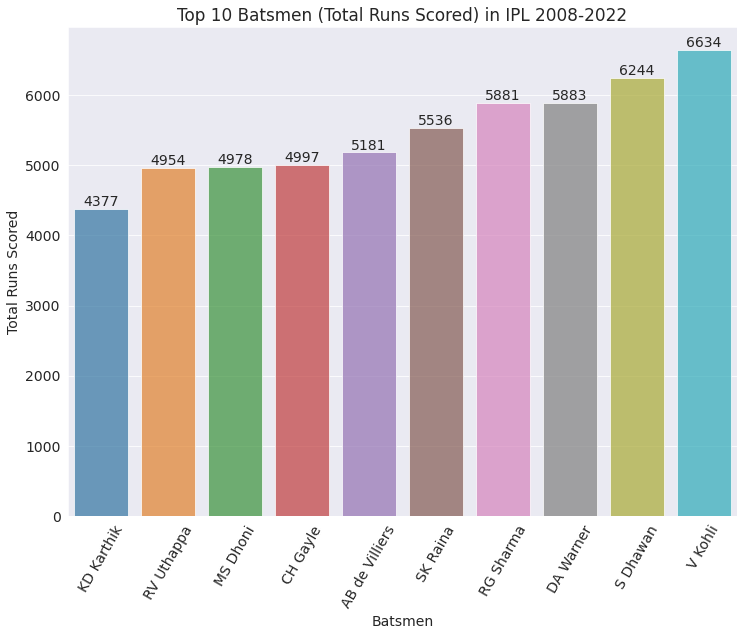

In [187]:
plt.figure(figsize=(12,9))

bar_order=top_10_batsman.sort_values('total_runs').batter
g=sns.barplot(x='batter',y='total_runs', data=top_10_batsman, order=bar_order, alpha=.7)
for i in g.containers:
    g.bar_label(i)
    
plt.xticks(rotation=60)
plt.xlabel("Batsmen")
plt.ylabel('Total Runs Scored')
plt.title("Top 10 Batsmen (Total Runs Scored) in IPL 2008-2022")
plt.show();

- Virat Kohli is the leading run-scorer with a total of 6634 runs.
- Shikhar Dhawan is second on the list with 6244 runs.
- David Warner occupies the third position with 5883 runs.
- Rohit Sharma and Suresh Raina are fourth and fifth respectively with 5881 and 5536 runs.
- AB de Villiers, Chris Gayle, MS Dhoni, Robin Uthappa, and Kedhar Jadhav complete the top ten list with 5181, 4997, 4978, 4954, and 4377 runs, respectively.

#### Q2: Who are the highest run scoring batsmen of each IPL season (2008-2022)?

In [188]:
#creating a dataframe by grouping by season and then by batsmen
#then aggregating on run scored by summing up the total runs to get the total runs scored by every player in each season
batsman_score_seasonwise=IPL_df.groupby(['Season','batter']).agg(run_scored=('batsman_run','sum')).reset_index()

Finding the index of the maximum run scored by a batsman in each season from the `batsman_score_seasonwise` dataframe. The `idxmax` function is returning the index of the maximum value for the `'run_scored'` column. So `max_runs` is a pandas series containing the index of the maximum run scored by a batsman in each season.

In [189]:
max_runs = batsman_score_seasonwise.groupby('Season')['run_scored'].idxmax()

In [190]:
max_runs

Season
2008     115
2009     229
2010     446
2011     502
2012     684
2013     910
2014    1088
2015    1148
2016    1383
2017    1422
2018    1594
2019    1694
2020    1866
2021    2051
2022    2144
Name: run_scored, dtype: int64

Using the indices from `max_runs` to extract the corresponding rows from `batsman_score_seasonwise` and store in the `top_batsmen_seasonwise` dataframe. Thus, `top_batsmen_seasonwise` contains the name of the top scorer for each season along with the runs scored.

In [191]:
top_batsmen_seasonwise = batsman_score_seasonwise.loc[max_runs]

In [192]:
print("Highest run scoring batsman in each IPL season (2008-2022)")
top_batsmen_seasonwise

Highest run scoring batsman in each IPL season (2008-2022)


,Season,batter,run_scored
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


***`Plotting the Highest run scoring batsman in each IPL season (2008-2022)`***

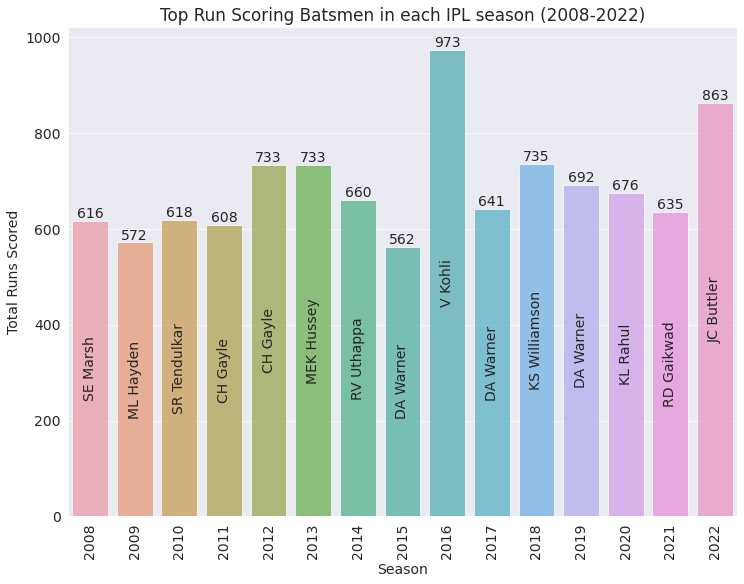

In [193]:
plt.figure(figsize=(12,9))

g=sns.barplot(x='Season', y='run_scored', data=top_batsmen_seasonwise, alpha=0.7)
for i in g.containers:
    g.bar_label(i)

for i, container in enumerate(g.containers):
    for j, child in enumerate(container.get_children()):
        x = child.get_x()+child.get_width()/2
        y = child.get_y()+child.get_height()/2
        plt.text(x, y, top_batsmen_seasonwise.iloc[i * len(container.get_children()) + j]['batter'], 
                 rotation='vertical',ha='center', va='center')
   
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel('Total Runs Scored')
plt.title("Top Run Scoring Batsmen in each IPL season (2008-2022)")
plt.show();

- Virat Kohli tops the chart with the highest runs of 973, making him the highest run-scorer in any IPL season till 2022.
- The highest run-scorer in a season varies widely, with David Warner and Chris Gayle holding the record for more than one season.
- The number of runs required to be the leading run-scorer has fluctuated over the years, with some seasons having higher totals than others.
- Several of the players on this list are well-known international cricketers, including Shane Watson, Sachin Tendulkar, Chris Gayle, and David Warner.
- Indian players have also been successful in scoring runs, with Suresh Raina, Virat Kohli, and KL Rahul all featuring on this list.
- The most recent season (2022) was won by Jos Buttler, who scored 863 runs.

#### Q3: What is the list of the top 10 batsmen who have hit the highest number of fours in IPL season 2008 to 2022?

Creating a new DataFrame `batsmen_fours` that groups the original IPL DataFrame (`IPL_df`) by the name of the batsman (`batter` column). The `agg()` function is then called to aggregate the number of fours hit by each batsman, which is calculated by counting the number of rows where the `batsman_run` column is equal to 4.

In [194]:
batsmen_fours=IPL_df[IPL_df.batsman_run==4].groupby('batter').agg(fours=('batsman_run','count')).reset_index()

In [195]:
#filtering the top 10 batsmen who have hit the most 4's
top_10_batsmen_fours=batsmen_fours.sort_values('fours', ascending=False).head(10)

In [196]:
print("Top 10 batsmen who have hit the highest number of fours in IPL season 2008 to 2022")
top_10_batsmen_fours

Top 10 batsmen who have hit the highest number of fours in IPL season 2008 to 2022


,batter,fours
379,S Dhawan,701
458,V Kohli,581
105,DA Warner,577
352,RG Sharma,519
401,SK Raina,506
143,G Gambhir,492
370,RV Uthappa,481
39,AM Rahane,431
209,KD Karthik,426
22,AB de Villiers,414


***`Plotting the top 10 batsmen who have hit the highest number of fours in IPL season 2008 to 2022.`***

A pie chart is plotted to show the top 10 batsmen who have scored the highest number of fours in IPL seasons 2008 to 2022. The data is first grouped by the batsmen's names, and the count of fours is aggregated. The resulting data is then sorted in descending order of the number of fours and stored in a variable. In the pie chart, each slice represents a batsman, and the size of the slice is proportional to the number of fours hit by the batsman. The text labels for each slice show the name of the batsman and the percentage of the total number of fours hit by all top 10 batsmen. The chart is embellished with some aesthetic features, such as exploding some slices and adding a shadow effect.

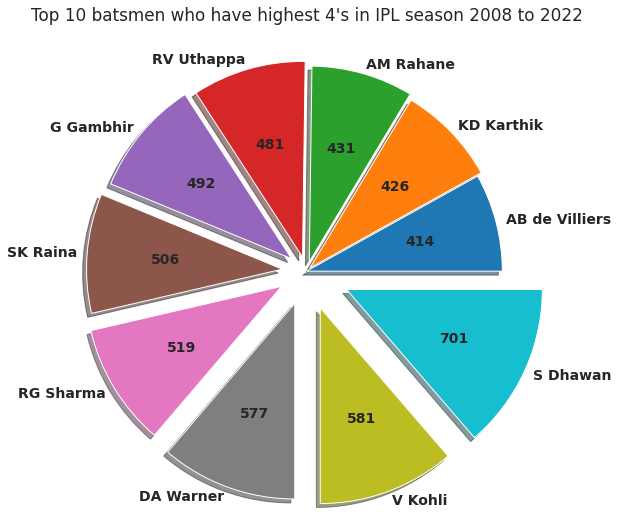

In [197]:
plt.figure(figsize=(9,9))

top_10_batsmen_fours_sorted=top_10_batsmen_fours.sort_values('fours')

explode=np.arange(0, 0.25, 0.025)
plt.pie(top_10_batsmen_fours_sorted.fours, labels=top_10_batsmen_fours_sorted.batter, textprops={'fontweight':'bold'},
        autopct= lambda x: '{:.0f}'.format(x*top_10_batsmen_fours.fours.sum()/100),startangle=360,
        explode=explode, shadow=True, labeldistance=1.05)
plt.title("Top 10 batsmen who have highest 4's in IPL season 2008 to 2022");

The pie chart shows the top ten batters with the most number of fours in the IPL as of 2022. From the chart, we can conclude that:

- Shikhar Dhawan is the batter with the most number of fours in IPL history, with 701 fours.
- Virat Kohli is in second place with 581 fours, followed closely by David Warner with 577 fours.
- The other batters in the top ten are Rohit Sharma, Suresh Raina, Gautam Gambhir, Robin Uthappa, Ajinkya Rahane, Dinesh Karthik, and AB de Villiers.
- The difference in the number of fours between the top batters is significant, with a difference of over 100 fours between the first and the second position.

#### Q4: Batsmen who have hit the most 4's in each IPL season (2008 - 2022)

Creating a new DataFrame called `seasonwise_4s` which groups the IPL data by season and batsman to calculate the number of fours each batsman has hit in each season. The `groupby` method is used to group the data by season and batter, and the `agg` method is used to calculate the count of fours for each group.

In [198]:
seasonwise_4s=IPL_df[IPL_df.batsman_run==4].groupby(['Season','batter']).agg(fours=('batsman_run','count')).reset_index()

In [199]:
#grouping the dataframe created above by "Season"
#using "idmax()" on the grouped data to get the index of maximum 4's hit in the season
max_4s=seasonwise_4s.groupby('Season')['fours'].idxmax()

In [200]:
max_4s

Season
2008      28
2009     176
2010     334
2011     464
2012     500
2013     683
2014     814
2015     856
2016     956
2017    1070
2018    1225
2019    1331
2020    1430
2021    1534
2022    1605
Name: fours, dtype: int64

In [201]:
#using "loc" method to filter those index from "seasonwise_4s" dataframe that match with the index in "max_4s"
seasonwise_max_4s=seasonwise_4s.loc[max_4s]

In [202]:
print("Maximum 4 hitting batsmen in each IPL season (2008 - 2022)")
seasonwise_max_4s

Maximum 4 hitting batsmen in each IPL season (2008 - 2022)


,Season,batter,fours
28,2008,G Gambhir,68
176,2009,ML Hayden,60
334,2010,SR Tendulkar,86
464,2011,SR Tendulkar,67
500,2012,AM Rahane,73
683,2013,MEK Hussey,81
814,2014,RV Uthappa,74
856,2015,DA Warner,65
956,2016,DA Warner,88
1070,2017,DA Warner,63


***`Plotting the Top 4 hitting Batsmen in each IPL season (2008-2022).`***

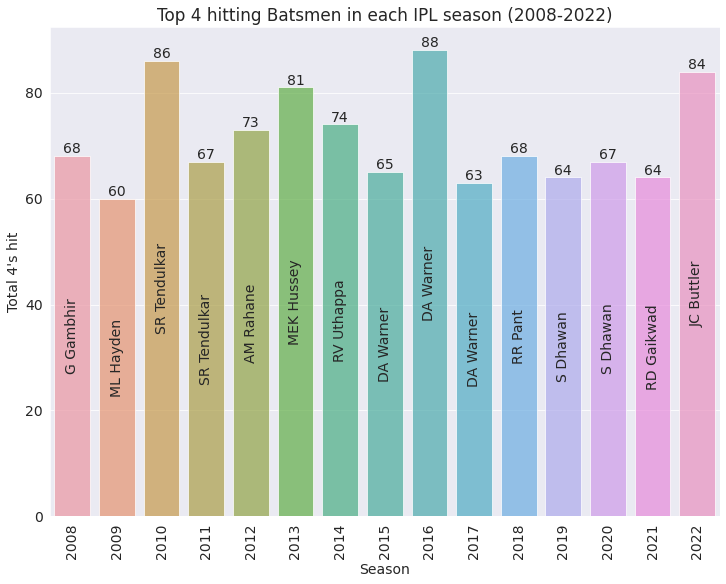

In [203]:
plt.figure(figsize=(12,9))

g=sns.barplot(x='Season', y='fours', data=seasonwise_max_4s, alpha=0.7)
for i in g.containers:
    g.bar_label(i)

for i, container in enumerate(g.containers):
    for j, child in enumerate(container.get_children()):
        x = child.get_x()+child.get_width()/2
        y = child.get_y()+child.get_height()/2
        plt.text(x, y, seasonwise_max_4s.iloc[i * len(container.get_children()) + j]['batter'], 
                 rotation='vertical',ha='center', va='center')
   
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Total 4's hit")
plt.title("Top 4 hitting Batsmen in each IPL season (2008-2022)")
plt.show();

Here are some observations that can be made from this graph:

- The number of fours hit by the top batter in a season has generally remained consistent around the range of 60-90.
- David Warner has hit the most fours in a single season with 88 fours in 2016, closely followed by Jos Buttler with 84 fours in 2022.
- Shikhar Dhawan and David Warner have appeared in the top for multiple times, with Shikhar Dhawan hitting 67 and 64 fours in the 2020 and 2019 seasons respectively and David Warner hitting highest 4's consecutively for 3 seasons. Also, Sachin Tendulkar appeared twice consecutively.
- Sachin Tendulkar, Gautam Gambhir and Matthew Hayden were the leading fours hitters in the first three seasons of the IPL with 86, 68 and 60 fours respectively.

#### Q5: What is the list of the top 10 batsmen who have hit the highest number of sixes in IPL season 2008 to 2022?

In [204]:
#creating a dataframe of batsmen and total sixes hit by all of them
batsmen_sixes=IPL_df[IPL_df.total_run==6].groupby('batter').agg(sixes=('total_run','count')).reset_index()

In [205]:
#filtering the 10 batsmen who have hit most sixes
top_10_batsmen_sixes=batsmen_sixes.sort_values('sixes', ascending=False).head(10).reset_index()

In [206]:
print("Top 10 batsmen who have hit the most sixes in IPL season (2008 - 2022)")
top_10_batsmen_sixes

Top 10 batsmen who have hit the most sixes in IPL season (2008 - 2022)


,index,batter,sixes
0,71,CH Gayle,354
1,13,AB de Villiers,250
2,289,RG Sharma,239
3,227,MS Dhoni,226
4,163,KA Pollard,221
5,380,V Kohli,218
6,85,DA Warner,213
7,327,SK Raina,203
8,343,SR Watson,190
9,306,RV Uthappa,182


***`Plotting Top 10 batsmen who have highest sixes in IPL season 2008 to 2022.`***

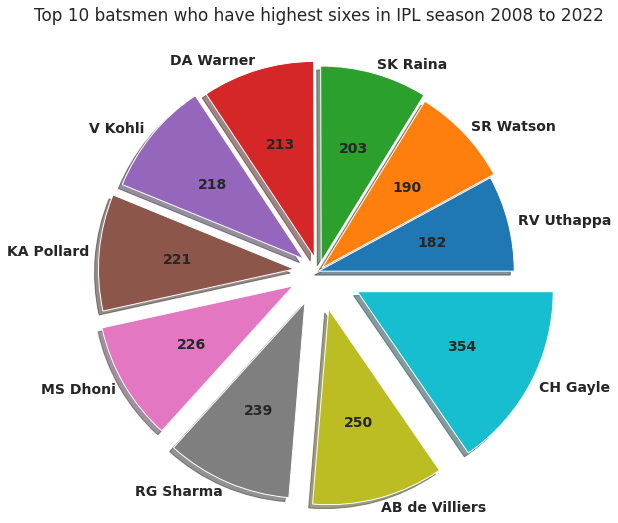

In [207]:
plt.figure(figsize=(9,9))

top_10_batsmen_sixes_sorted=top_10_batsmen_sixes.sort_values('sixes')

explode=np.arange(0, 0.25, 0.025)
plt.pie(top_10_batsmen_sixes_sorted.sixes, labels=top_10_batsmen_sixes_sorted.batter, textprops={'fontweight':'bold'},
        autopct= lambda x: '{:.0f}'.format(x*top_10_batsmen_sixes.sixes.sum()/100),startangle=360,
        explode=explode, shadow=True, labeldistance=1.05)
plt.title("Top 10 batsmen who have highest sixes in IPL season 2008 to 2022");

The chart shows the number of sixes hit by the top 10 batters in the IPL, as of 2021. Here are some conclusions that can be drawn from the chart:

- Chris Gayle is the leading six-hitter in the IPL, with 354 sixes.
- AB de Villiers is second on the list with 250 sixes.
- The top 10 includes several well-known batters such as Virat Kohli, MS Dhoni, Rohit Sharma, and David Warner.
- The difference in the number of sixes between the top two players is quite significant, with Gayle hitting 104 more sixes than de Villiers.
- The lowest number of sixes hit by a player in the top 10 is 182, which shows the dominance of these players in terms of hitting sixes in the IPL.
- Moreover, the trend shows that players are hitting more sixes with each passing season, highlighting the increased importance of this aspect of the game in the IPL.

#### Q6: Batsmen who have hit the most sixes in each IPL season (2008 - 2022)

In [208]:
batsmen_sixes_seasonwise=IPL_df[IPL_df.total_run==6].groupby(['Season','batter']).agg(sixes=('total_run','count')).reset_index()

In [209]:
max_sixes=batsmen_sixes_seasonwise.groupby('Season')['sixes'].idxmax()

In [210]:
top_batsmen_sixes_seasonwise=batsmen_sixes_seasonwise.loc[max_sixes]

In [211]:
print("Season wise highest 6 hitters of IPL season 2008 to 2022")
top_batsmen_sixes_seasonwise

Season wise highest 6 hitters of IPL season 2008 to 2022


,Season,batter,sixes
79,2008,ST Jayasuriya,30
100,2009,AC Gilchrist,29
243,2010,RV Uthappa,27
284,2011,CH Gayle,43
386,2012,CH Gayle,57
484,2013,CH Gayle,50
589,2014,GJ Maxwell,36
659,2015,CH Gayle,38
739,2016,AB de Villiers,37
861,2017,GJ Maxwell,26


***`Plotting season wise highest 6 hitters of IPL season 2008 to 2022.`***

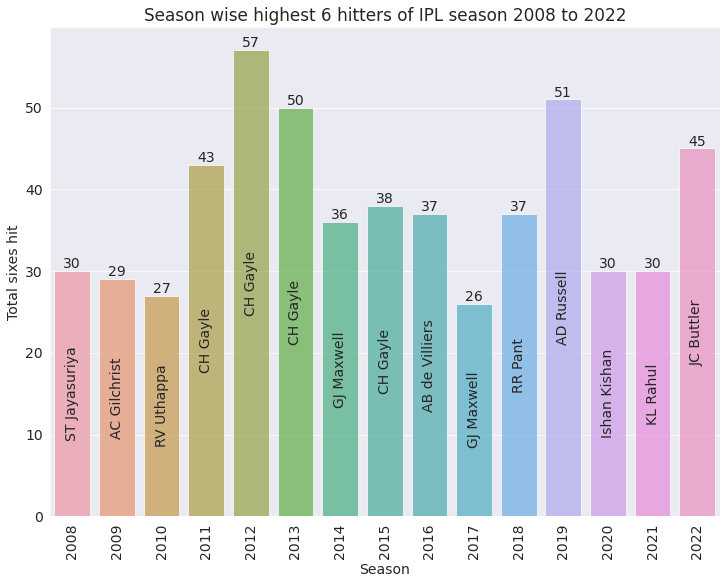

In [212]:
plt.figure(figsize=(12,9))

g=sns.barplot(x='Season', y='sixes', data=top_batsmen_sixes_seasonwise, alpha=0.7)
for i in g.containers:
    g.bar_label(i)

for i, container in enumerate(g.containers):
    for j, child in enumerate(container.get_children()):
        x = child.get_x()+child.get_width()/2
        y = child.get_y()+child.get_height()/2
        plt.text(x, y, top_batsmen_sixes_seasonwise.iloc[i * len(container.get_children()) + j]['batter'], 
                 rotation='vertical',ha='center', va='center')
   
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Total sixes hit")
plt.title("Season wise highest 6 hitters of IPL season 2008 to 2022")
plt.show();

- The data indicates that the number of sixes hit by the leading player has varied widely over the years, with a high of 57 by Chris Gayle in 2012 and a low of 26 by Glenn Maxwell in 2017.
- However, the trend seems to be upward, with more players hitting more sixes in recent years.
- Chris Gayle is the most frequent name on the list, with four seasons where he hit the most sixes.
- Other player who has topped the list multiple times include Glenn Maxwell, who has done it twice.

#### Q7: What is the list of the top 10 wicket-taking bowlers in IPL season 2008 - 2022?

In [213]:
bowler_wickets=IPL_df[IPL_df.isWicketDelivery==1].groupby('bowler').agg(total_wickets=('isWicketDelivery','count')).reset_index()

In [214]:
top_10_bowler_wickets=bowler_wickets.sort_values('total_wickets', ascending=False).head(10).reset_index()

In [215]:
print("Top 10 wicket-taking bowlers in IPL season 2008 - 2022")
top_10_bowler_wickets

Top 10 wicket-taking bowlers in IPL season 2008 - 2022


,index,bowler,total_wickets
0,94,DJ Bravo,207
1,340,SL Malinga,188
2,6,A Mishra,175
3,278,R Ashwin,174
4,404,YS Chahal,172
5,347,SP Narine,171
6,271,PP Chawla,165
7,55,B Kumar,165
8,158,JJ Bumrah,161
9,131,Harbhajan Singh,161


***`Plotting top 10 wicket-taking bowlers in IPL season 2008 - 2022.`***

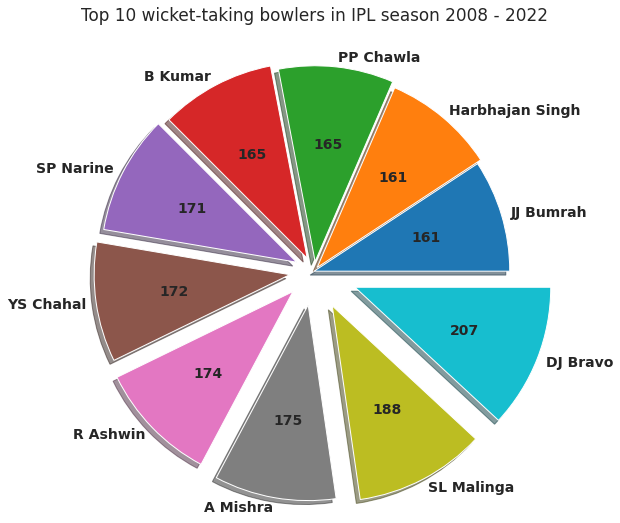

In [216]:
plt.figure(figsize=(9,9))

top_10_bowler_wickets_sorted=top_10_bowler_wickets.sort_values('total_wickets')

explode=np.arange(0, 0.25, 0.025)
plt.pie(top_10_bowler_wickets_sorted.total_wickets, labels=top_10_bowler_wickets_sorted.bowler, textprops={'fontweight':'bold'},
        autopct= lambda x: '{:.0f}'.format(x*top_10_bowler_wickets_sorted.total_wickets.sum()/100),startangle=360,
        explode=explode, shadow=True, labeldistance=1.05)
plt.title("Top 10 wicket-taking bowlers in IPL season 2008 - 2022");

- DJ Bravo is the leading wicket-taker in IPL history with 207 wickets, followed by SL Malinga with 188 wickets and A Mishra with 175 wickets.
- All the bowlers in the top 10 have taken more than 160 wickets in their IPL career, which shows their consistency and effectiveness in the tournament.
- Spin bowlers have a significant presence in the top 10 with 5 out of 10 bowlers being spinners.

#### Q8: Bowlers who took the most wickets in each IPL season of 2008 - 2022

In [217]:
bowler_wickets_seasonwise=IPL_df[IPL_df.isWicketDelivery==1].groupby(['Season','bowler']).agg(total_wickets=('isWicketDelivery','count')).reset_index()

In [218]:
max_wickets=bowler_wickets_seasonwise.groupby('Season')['total_wickets'].idxmax()

In [219]:
top_bowler_wickets_seasonwise=bowler_wickets_seasonwise.loc[max_wickets]

In [220]:
print("Top wickets takers season wise in IPL season 2008 to 2022")
top_bowler_wickets_seasonwise

Top wickets takers season wise in IPL season 2008 to 2022


,Season,bowler,total_wickets
77,2008,Sohail Tanvir,24
157,2009,RP Singh,26
248,2010,PP Ojha,22
375,2011,SL Malinga,30
447,2012,M Morkel,30
519,2013,DJ Bravo,34
650,2014,MM Sharma,26
708,2015,DJ Bravo,28
791,2016,B Kumar,24
879,2017,B Kumar,28


***`Plotting season wise top wicket takers of IPL season 2008 to 2022.`***

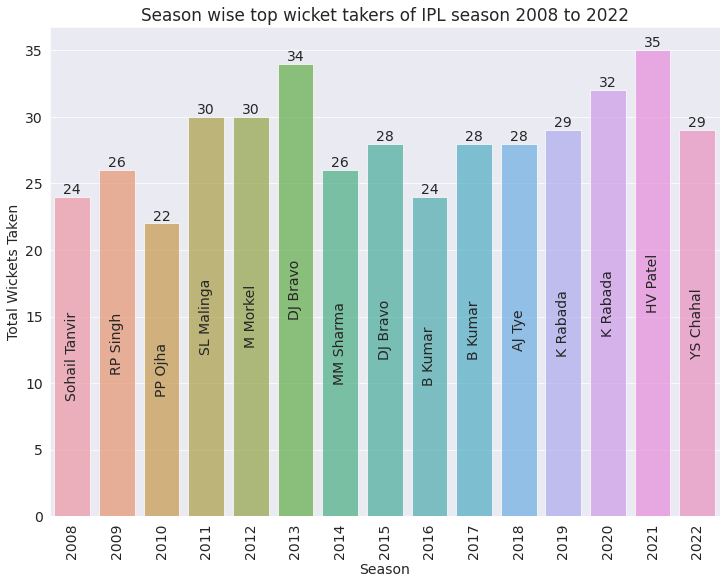

In [221]:
plt.figure(figsize=(12,9))

g=sns.barplot(x='Season', y='total_wickets', data=top_bowler_wickets_seasonwise, alpha=0.7)
for i in g.containers:
    g.bar_label(i)

for i, container in enumerate(g.containers):
    for j, child in enumerate(container.get_children()):
        x = child.get_x()+child.get_width()/2
        y = child.get_y()+child.get_height()/2
        plt.text(x, y, top_bowler_wickets_seasonwise.iloc[i * len(container.get_children()) + j]['bowler'], 
                 rotation='vertical',ha='center', va='center')
   
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Total Wickets Taken")
plt.title("Season wise top wicket takers of IPL season 2008 to 2022")
plt.show();

- The number of wickets taken by the leading bowler has generally been around 25-35 in most seasons, with a few exceptions like 2021 when Harshal Patel took 35 wickets.
- DJ Bravo is the only bowler to have topped the wicket-taking charts in two different seasons, in 2013 and 2015.
- K Rabada is the only bowler to have topped the wicket-taking charts in two consecutive seasons, in 2019 and 2020.
- Spinners have been among the leading wicket-takers in several seasons, with PP Ojha, YS Chahal, and HV Patel being the only spinners to top the charts in their respective seasons.

#### Q9: Who has won the most player of the match award?

In [222]:
player_of_match_df=match_df.groupby('Player_of_Match').agg(pom_count=('Player_of_Match','count')).reset_index()

In [223]:
player_of_match_df.sort_values('pom_count', ascending=False).head(1)

,Player_of_Match,pom_count
10,AB de Villiers,25


In [224]:
print("{} has won the highest number of player of the match awards,".
      format((player_of_match_df.sort_values('pom_count', ascending=False).head(1)).at[10,'Player_of_Match']),
      "which is {} times.".format((player_of_match_df.sort_values('pom_count', ascending=False).head(1)).at[10,'pom_count'])
     )

AB de Villiers has won the highest number of player of the match awards, which is 25 times.


#### Q10: Top 10 players who have won the player of the match award.

In [225]:
top_10_pom=player_of_match_df.sort_values('pom_count', ascending=False).head(10)

In [226]:
print("Top 10 player of the match award holders in IPL season (2008 - 2022)")
top_10_pom

Top 10 player of the match award holders in IPL season (2008 - 2022)


,Player_of_Match,pom_count
10,AB de Villiers,25
38,CH Gayle,22
195,RG Sharma,18
48,DA Warner,18
153,MS Dhoni,17
259,YK Pathan,16
232,SR Watson,16
219,SK Raina,14
102,KA Pollard,14
251,V Kohli,14


***`Plotting the top 10 player of the match award holders in IPL season (2008 - 2022).`***

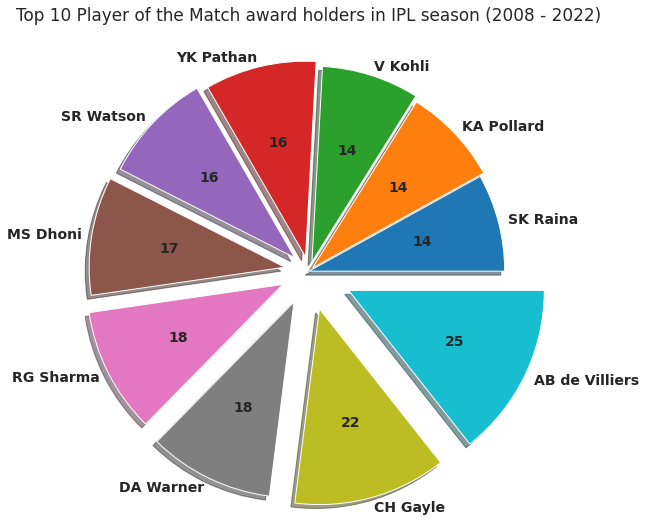

In [227]:
plt.figure(figsize=(9,9))

top_10_pom_sorted=top_10_pom.sort_values('pom_count')

explode=np.arange(0, 0.25, 0.025)
plt.pie(top_10_pom_sorted.pom_count, labels=top_10_pom_sorted.Player_of_Match, textprops={'fontweight':'bold'},
        autopct= lambda x: '{:.0f}'.format(x*top_10_pom_sorted.pom_count.sum()/100),startangle=360,
        explode=explode, shadow=True, labeldistance=1.05)
plt.title("Top 10 Player of the Match award holders in IPL season (2008 - 2022)");

- AB de Villiers has won the most number of Player of the Match awards with a count of 25.
- Chris Gayle and David Warner follow closely with 22 and 18 awards respectively.
- The top 10 players in terms of Player of the Match awards are dominated by batsmen with only one all-rounder (YK Pathan) featuring in the list.
- The count of awards won by players in this list ranges from 14 to 25, indicating the consistency and impact of these players in the IPL.

#### Q11: Who are the top season wise top player of the match?

In [228]:
seasonwise_pom_df= match_df.groupby(['Season','Player_of_Match']).agg(pom_count=('Player_of_Match','count')).reset_index()

In [229]:
max_pom=seasonwise_pom_df.groupby('Season')['pom_count'].idxmax()

In [230]:
seasonwise_top_pom_df=seasonwise_pom_df.loc[max_pom]

In [231]:
print("Top Player of the Match award holders in each IPL season of 2008 to 2022")
seasonwise_top_pom_df

Top Player of the Match award holders in each IPL season of 2008 to 2022


,Season,Player_of_Match,pom_count
28,2008,SE Marsh,5
80,2009,YK Pathan,3
121,2010,SR Tendulkar,4
133,2011,CH Gayle,6
189,2012,CH Gayle,5
254,2013,MEK Hussey,5
286,2014,GJ Maxwell,4
320,2015,DA Warner,4
388,2016,V Kohli,5
394,2017,BA Stokes,3


***`Plotting the season wise top 'Player of the Match' award holders of IPL season 2008 to 2022.`***

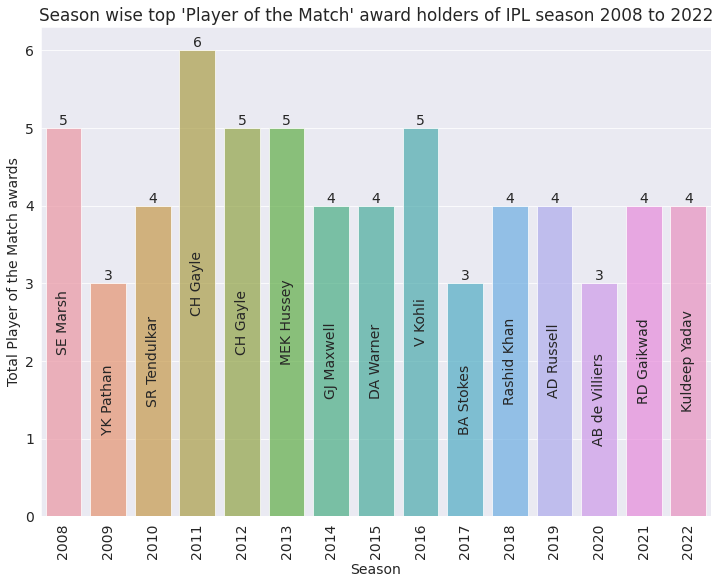

In [232]:
plt.figure(figsize=(12,9))

g=sns.barplot(x='Season', y='pom_count', data=seasonwise_top_pom_df, alpha=0.7)
for i in g.containers:
    g.bar_label(i)

for i, container in enumerate(g.containers):
    for j, child in enumerate(container.get_children()):
        x = child.get_x()+child.get_width()/2
        y = child.get_y()+child.get_height()/2
        plt.text(x, y, seasonwise_top_pom_df.iloc[i * len(container.get_children()) + j]['Player_of_Match'], 
                 rotation='vertical',ha='center', va='center')
   
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Total Player of the Match awards")
plt.title("Season wise top 'Player of the Match' award holders of IPL season 2008 to 2022")
plt.show();

- The Player of the Match award was given to a different player in each season.
- CH Gayle is the only players to has won the award multiple times in different seasons.
- Indian players have won the award the most number of times (Sachin Tendulkar, Virat Kohli, and Ruturaj Gaikwad).
- All-rounders do not dominate the list, with only two of them (YK Pathan and BA Stokes) winning the award in a season.

#### Q12: What is the total number of matches played in each venue?

In [233]:
team_venuewise_stats_df.columns

Index(['Team', 'Venue', 'Matches_played', 'Matches_won', 'Win_Rate'], dtype='object')

In [234]:
#using the "team_venuewise_stats_df" that was created earlier for venue wise stats of every team
#grouping the dataframe on "Venue" and aggregating by summing up the matches played.
print("Total matches played in each venue:")
venue_total_matches=team_venuewise_stats_df.groupby('Venue').agg(matches_played=('Matches_played','sum')).sort_values('matches_played').reset_index()
venue_total_matches

Total matches played in each venue:


,Venue,matches_played
0,OUTsurance Oval,4
1,Buffalo Park,6
2,De Beers Diamond Oval,6
3,"Vidarbha Cricket Association Stadium, Jamtha",6
4,Green Park,8
5,Nehru Stadium,10
6,Shaheed Veer Narayan Singh International Stadium,12
7,Barabati Stadium,14
8,Newlands,14
9,"Narendra Modi Stadium, Ahmedabad",14


***`Plotting the total number of matches played in each venue in IPL season 2008 to 2022.`***

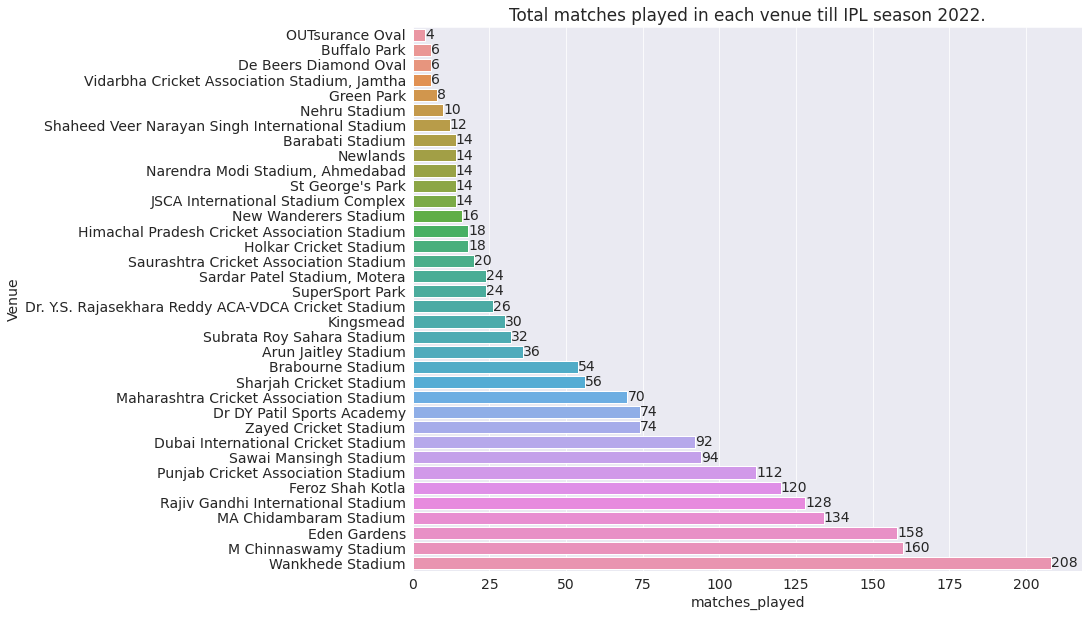

In [235]:
plt.figure(figsize=(12,10))
g=sns.barplot(x='matches_played', y='Venue', data=venue_total_matches )
for i in g.containers:
    g.bar_label(i)
    
plt.title("Total matches played in each venue till IPL season 2022.");

- Wankhede Stadium in Mumbai has hosted the most number of matches (208) among all the venues listed.
- Eden Gardens in Kolkata and M. Chinnaswamy Stadium in Bengaluru have also hosted a large number of matches (158 and 160, respectively).
- Dubai International Cricket Stadium, Sawai Mansingh Stadium in Jaipur, and Punjab Cricket Association Stadium in Mohali have hosted a significant number of matches (92, 94, and 112, respectively).

## Inferences and Conclusion

The analysis provides several insights into IPL data from 2008 to 2022 which are as follows: 

- The heatmap of the number of matches played in every season shows that the number of matches has increased over the years.
- Mumbai Indians is the most successful team in IPL history, having won 5 titles, followed by Chennai Super Kings and Kolkata Knight Riders.
- The performance of teams in playoffs was analyzed, and it was found that Chennai Super Kings has the highest number of appearances in playoffs followed by Mumbai Indians and Royal Challengers Bangalore.
- In the finals played, Chhenai Super Kings has played the highest number of finals with 4 wins, followed by Mumbai Indians, playing 6 finals and having 5 wins.
- When it comes to the top 10 batsmen in terms of total runs scored in IPL, Virat Kohli has scored the most number of runs followed by Shikhar Dhawan and David Warner.
- The top batsmen season-wise analysis showed that Virat Kohli, Jos Buttler, and Kane Williamson have been the highest run-scorers in different seasons.
- When it comes to the most number of fours hit by a batsman in IPL, Shikhar Dhawan has hit the most number of fours, followed by Virat Kohli and David Warner.
- Finally, the season-wise analysis of fours hit by batsmen showed that David Warner, Sachin Tendulkar and Jos Buttler have hit the most number of fours in different seasons. David warner has been the highest 4 hitter consecutively for 3 IPL seasons
- When it comes to the most number of sixes hit by a batsman in IPL, Chris Gayle has hit the most number of sixes followed by AB de Villiers and Rohit Sharma.
- Finally, the season-wise analysis of sixes hit by batsmen showed that Chris Gayle and Andre Russell have hit the most number of sixes in different seasons with Chris Gayle appearing as the highest six hitter in several seasons.
- When it comes to top wicket takers in IPL, Dwayne Bravo has taken the most wickets, followed by Lasith Malinga and Amit Mishra.
- Seasonwise analysis of wicket takers showed that Harshal Patel, Dwayne Bravo and Kagiso Rabada have taken the most wickets in different seasons.
- Highest number of IPL matches were played in Wankhede Stadium, Mumbai, India.

## References and Future Work

`Possible Future Work:`
The dataset consists of a massive amount of IPL data and it presents a remarkable chance to conduct various other types of analyses, and after the conclusion of IPL 2023 season, incorporating the fresh data will allow us to identify new trends and patterns in the existing data.

In addition, leveraging machine learning models to anticipate future match results or individual player performances is also possible. This can be accomplished by employing diverse techniques such as regression analysis, time-series analysis, and other analytical methodologies.

`References:` The following are a few links that have been referred to throughout the project for the purpose of reference.

- GeeksforGeeeks: https://www.geeksforgeeks.org
- PythonGuides: https://pythonguides.com/matplotlib/
- stakcoverflow: https://stackoverflow.com
- Pandas: https://pandas.pydata.org/docs/index.html
- https://matplotlib.org/stable/index.html
- https://seaborn.pydata.org/

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "skimteyajali1998/ipl-data-analysis-2008-to-2022" on https://jovian.com
